In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'times new roman'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data_path = os.path.join('../data/billboard-spotify.csv')
df = pd.read_csv(data_path, encoding='latin1')
df = df.drop([], axis='columns')
df.head()

rank                                      song  \
0     1                               wooly bully   
1     2  i cant help myself sugar pie honey bunch   
2     3                i cant get no satisfaction   
3     4                       you were on my mind   
4     5              youve lost that lovin feelin   

                          artist  year  \
0  sam the sham and the pharaohs  1965   
1                      four tops  1965   
2             the rolling stones  1965   
3                        we five  1965   
4         the righteous brothers  1965   

                                              lyrics  acousticness  \
0  sam the sham miscellaneous wooly bully wooly b...        0.7130   
1   sugar pie honey bunch you know that i love yo...        0.2040   
2                                                           0.0348   
3   when i woke up this morning you were on my mi...        0.4850   
4   you never close your eyes anymore when i kiss...        0.5040   

   danceability  duration_ms  energy  explicit   ...    mode  popularity  \
0         0.582     140867.0   0.575       0.0   ...     1.0        51.0   
1         0.686     163680.0   0.714       0.0   ...     1.0        63.0   
2         0.725     222813.0   0.853       0.0   ...     1.0        68.0   
3         0.510     155960.0   0.565       0.0   ...     0.0        35.0   
4         0.390     225227.0   0.309       0.0   ...     1.0        57.0   

   release_date  speechiness  \
0    1987-08-04       0.0529   
1    2008-01-01       0.0287   
2    1965-07-30       0.0353   
3    2010-01-01       0.0500   
4          1990       0.0265   

                                  spotify_album_name  \
0  Full Metal Jacket (Original Motion Picture Sou...   
1                          The Definitive Collection   
2                      Out Of Our Heads (Remastered)   
3                                You Were On My Mind   
4  The Very Best Of The Righteous Brothers - Unch...   

                spotify_artist  \
0  Sam The Sham & The Pharaohs   
1                    Four Tops   
2           The Rolling Stones   
3                      We Five   
4       The Righteous Brothers   

                                        spotify_name    tempo time_signature  \
0                                        Wooly Bully  140.601            4.0   
1       I Can't Help Myself (Sugar Pie, Honey Bunch)  126.736            4.0   
2  (I Can't Get No) Satisfaction - Mono Version /...  136.282            4.0   
3                                You Were On My Mind  143.381            4.0   
4                    You've Lost That Lovin' Feelin'   94.444            4.0   

  valence  
0   0.558  
1   0.964  
2   0.904  
3   0.700  
4   0.459  

[5 rows x 24 columns]

# Artist diversity by year
There appears to be a slight downward trend of number of unique artists over time, though it is hard to say given the relatively few data points. 

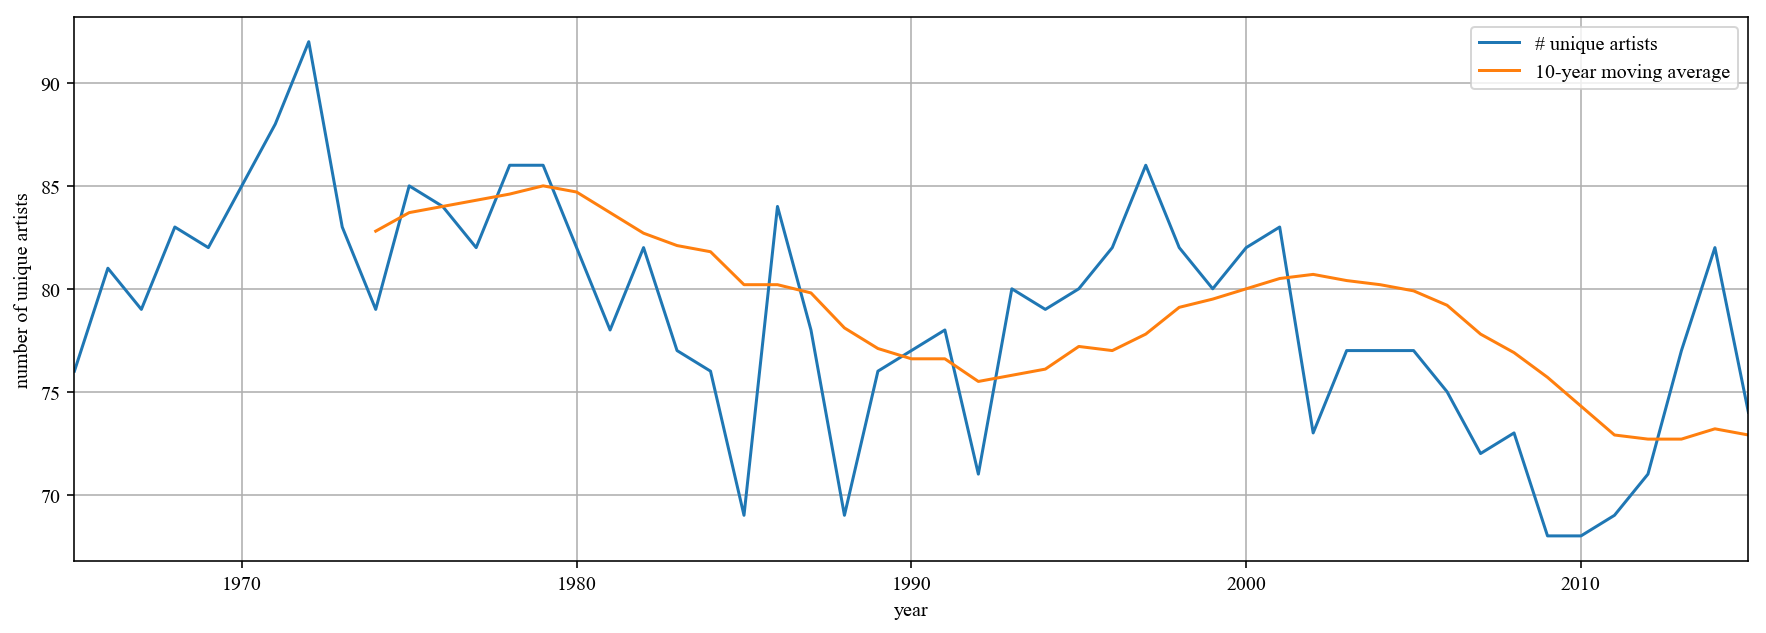

In [4]:
# remove all featured artists, leave only primary artist
df['artist_base'] = df['artist'].apply(lambda x: re.sub("\s\(*feat.*", '', x))
nunique_artists_year = df.groupby(['year'])['artist_base'].agg(pd.Series.nunique)
ax = nunique_artists_year.plot.line(figsize = (15,5), grid=True, label='# unique artists')
ax.set(ylabel = 'number of unique artists')
nunique_artists_year.rolling(window=10).mean().plot(grid=True, label='10-year moving average')
plt.legend()

[Text(0,0.5,'# songs in top 100'), Text(0.5,0,'artist')]

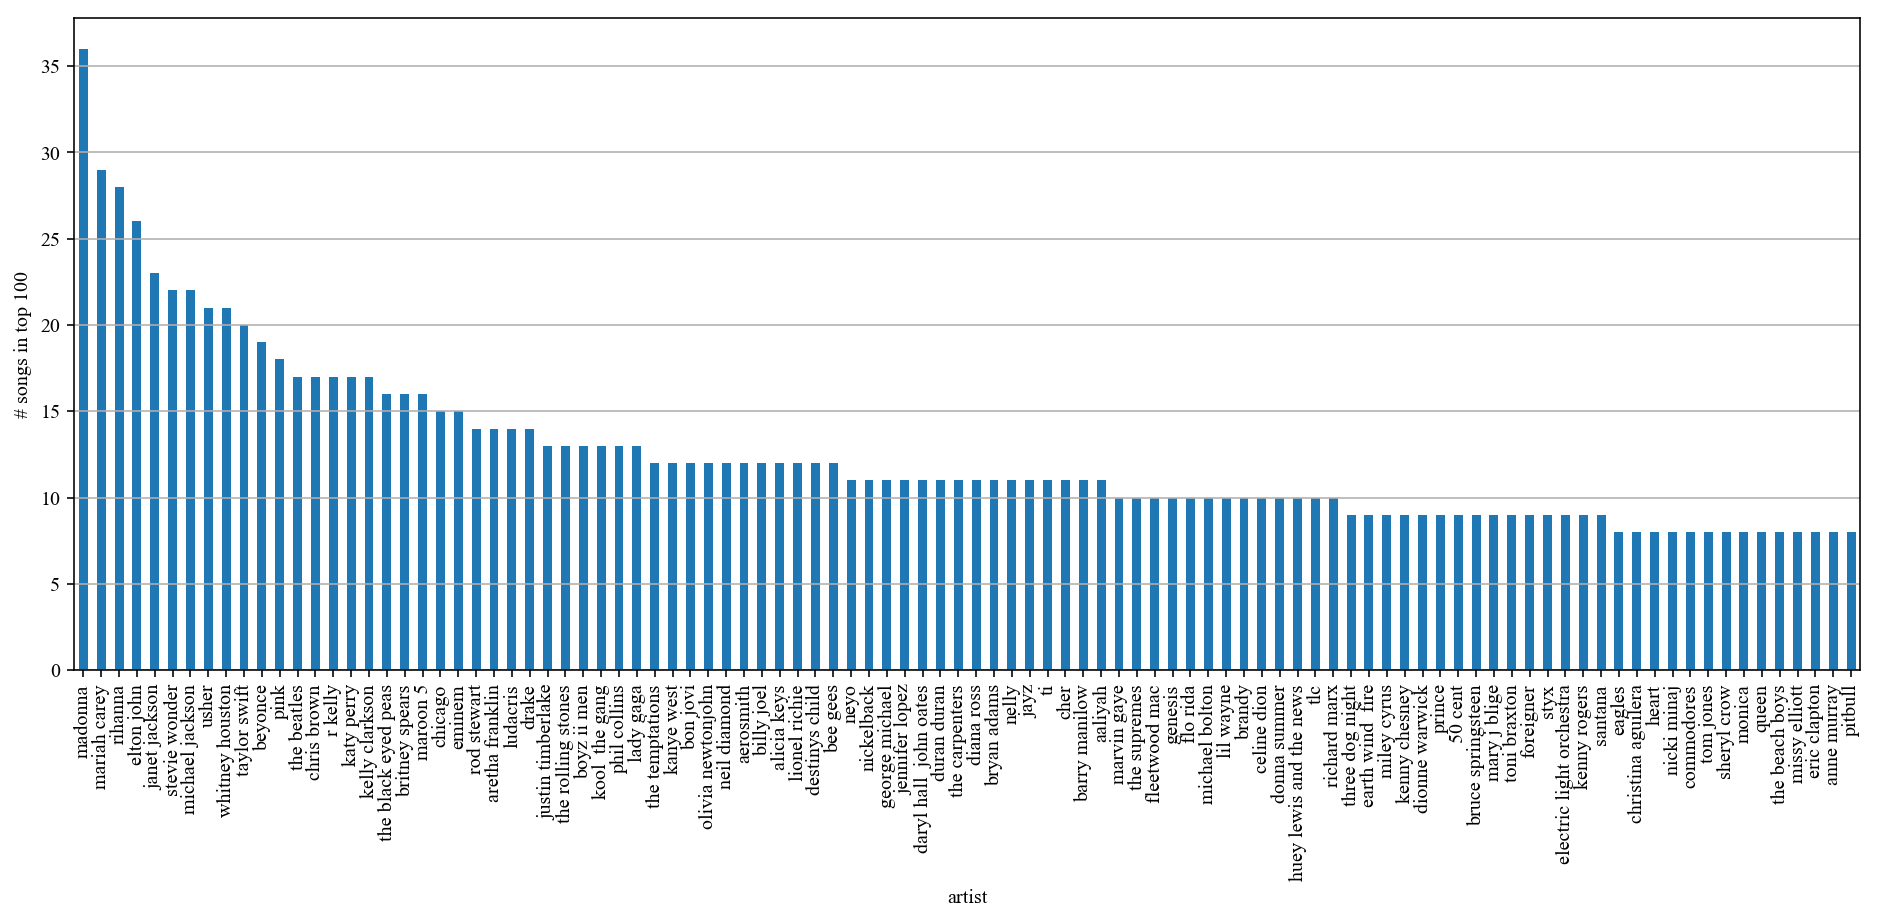

In [213]:
ax = df['artist_base'].value_counts().head(100).plot.bar(figsize=(16,6))
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='# songs in top 100')

[Text(0,0.5,'# years between earliest and latest top 100 single'),
 Text(0.5,0,'artist')]

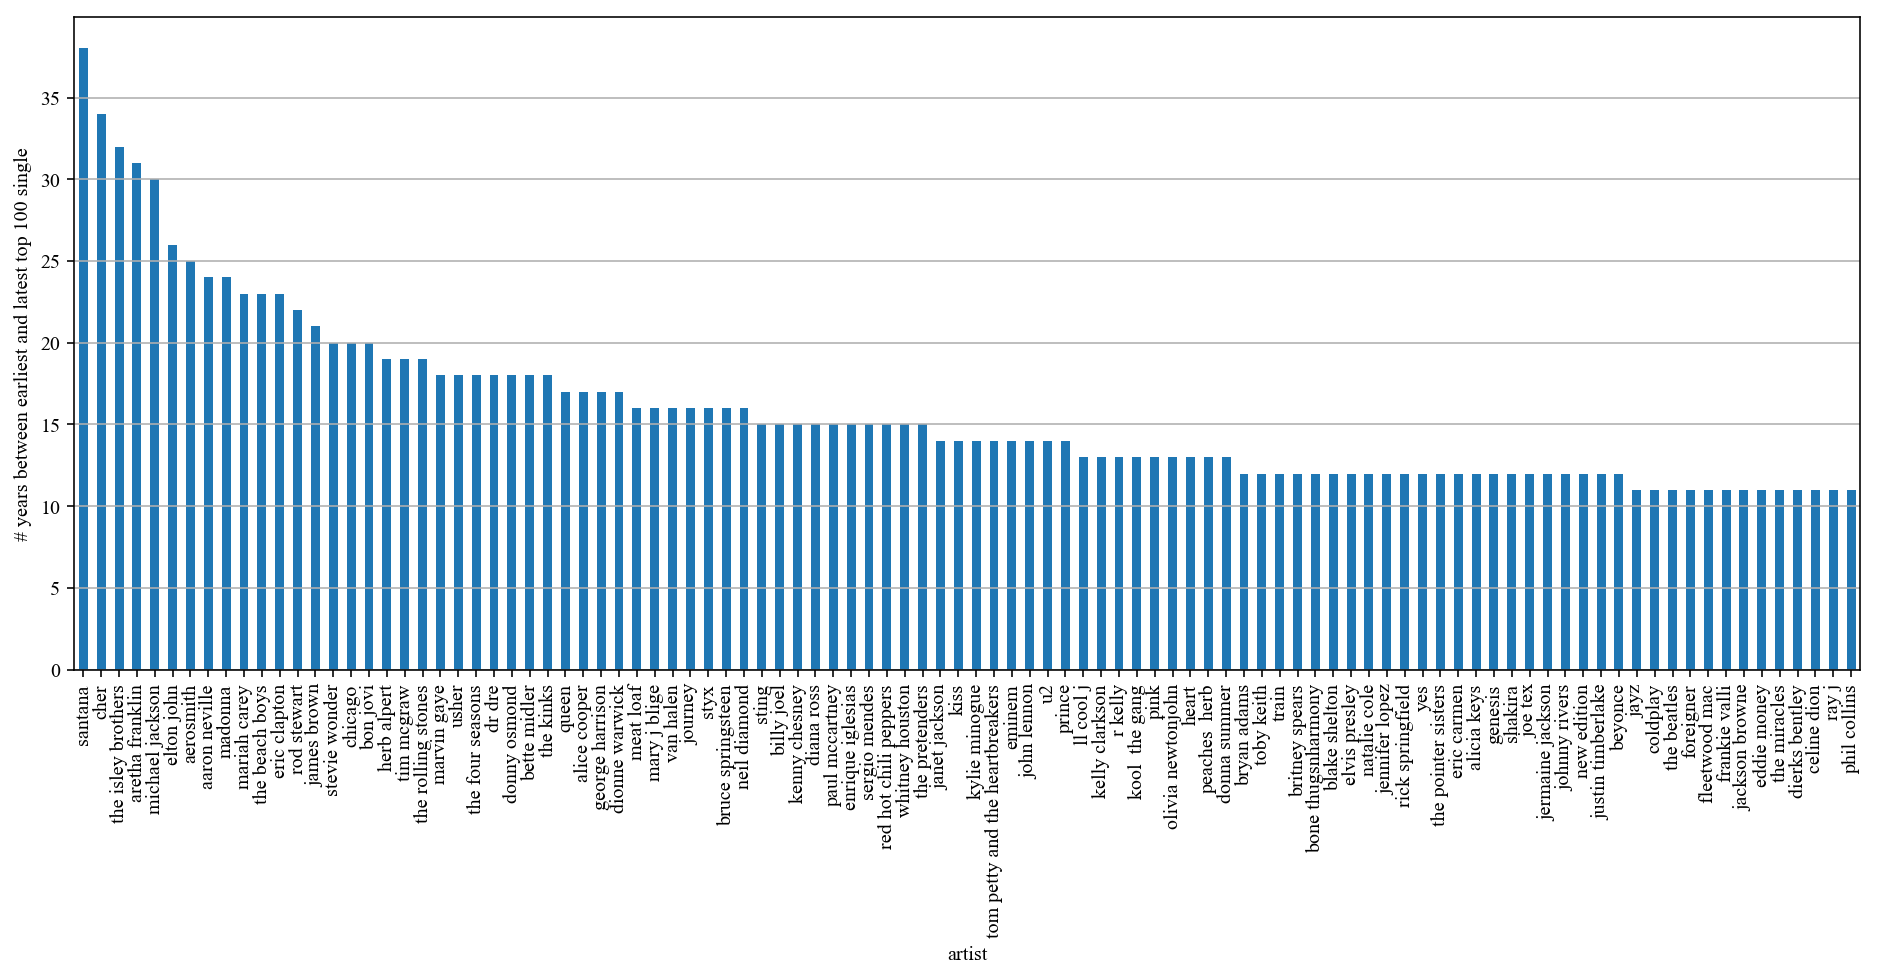

In [7]:
plt.figure(figsize=(16,6))
ax = df.groupby(['artist_base'])['year'].agg(np.ptp).sort_values(ascending=False).head(100).plot.bar()
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='# years between earliest and latest top 100 single')

# Verbosity over time
The average number of words per second for top 100 singles has ticked up over time and stabilized.

In [8]:
num_words = df['lyrics'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['words_per_sec'] = num_words / (df['duration_ms'] / 1000)

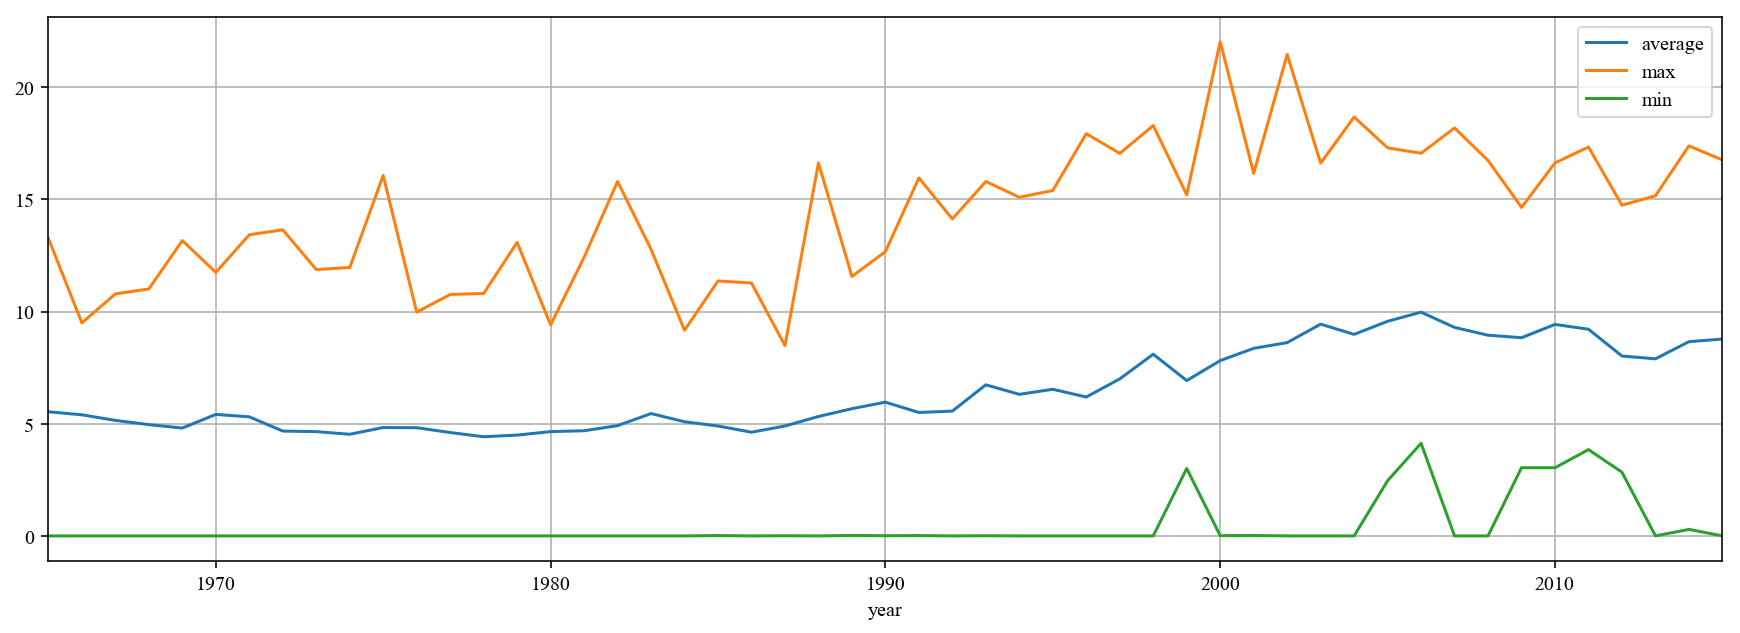

In [12]:
avg_wps_by_year = df.groupby(['year'])['words_per_sec'].mean()
max_wps_by_year = df.groupby(['year'])['words_per_sec'].max()
min_wps_by_year = df.groupby(['year'])['words_per_sec'].min()

ax = avg_wps_by_year.plot.line(grid=True, figsize=(15,5), label='average')
max_wps_by_year.plot.line(ax=ax, grid=True, figsize=(15,5), label='max')
min_wps_by_year.plot.line(ax=ax, grid=True, figsize=(15,5), label='min')
ax.legend()

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


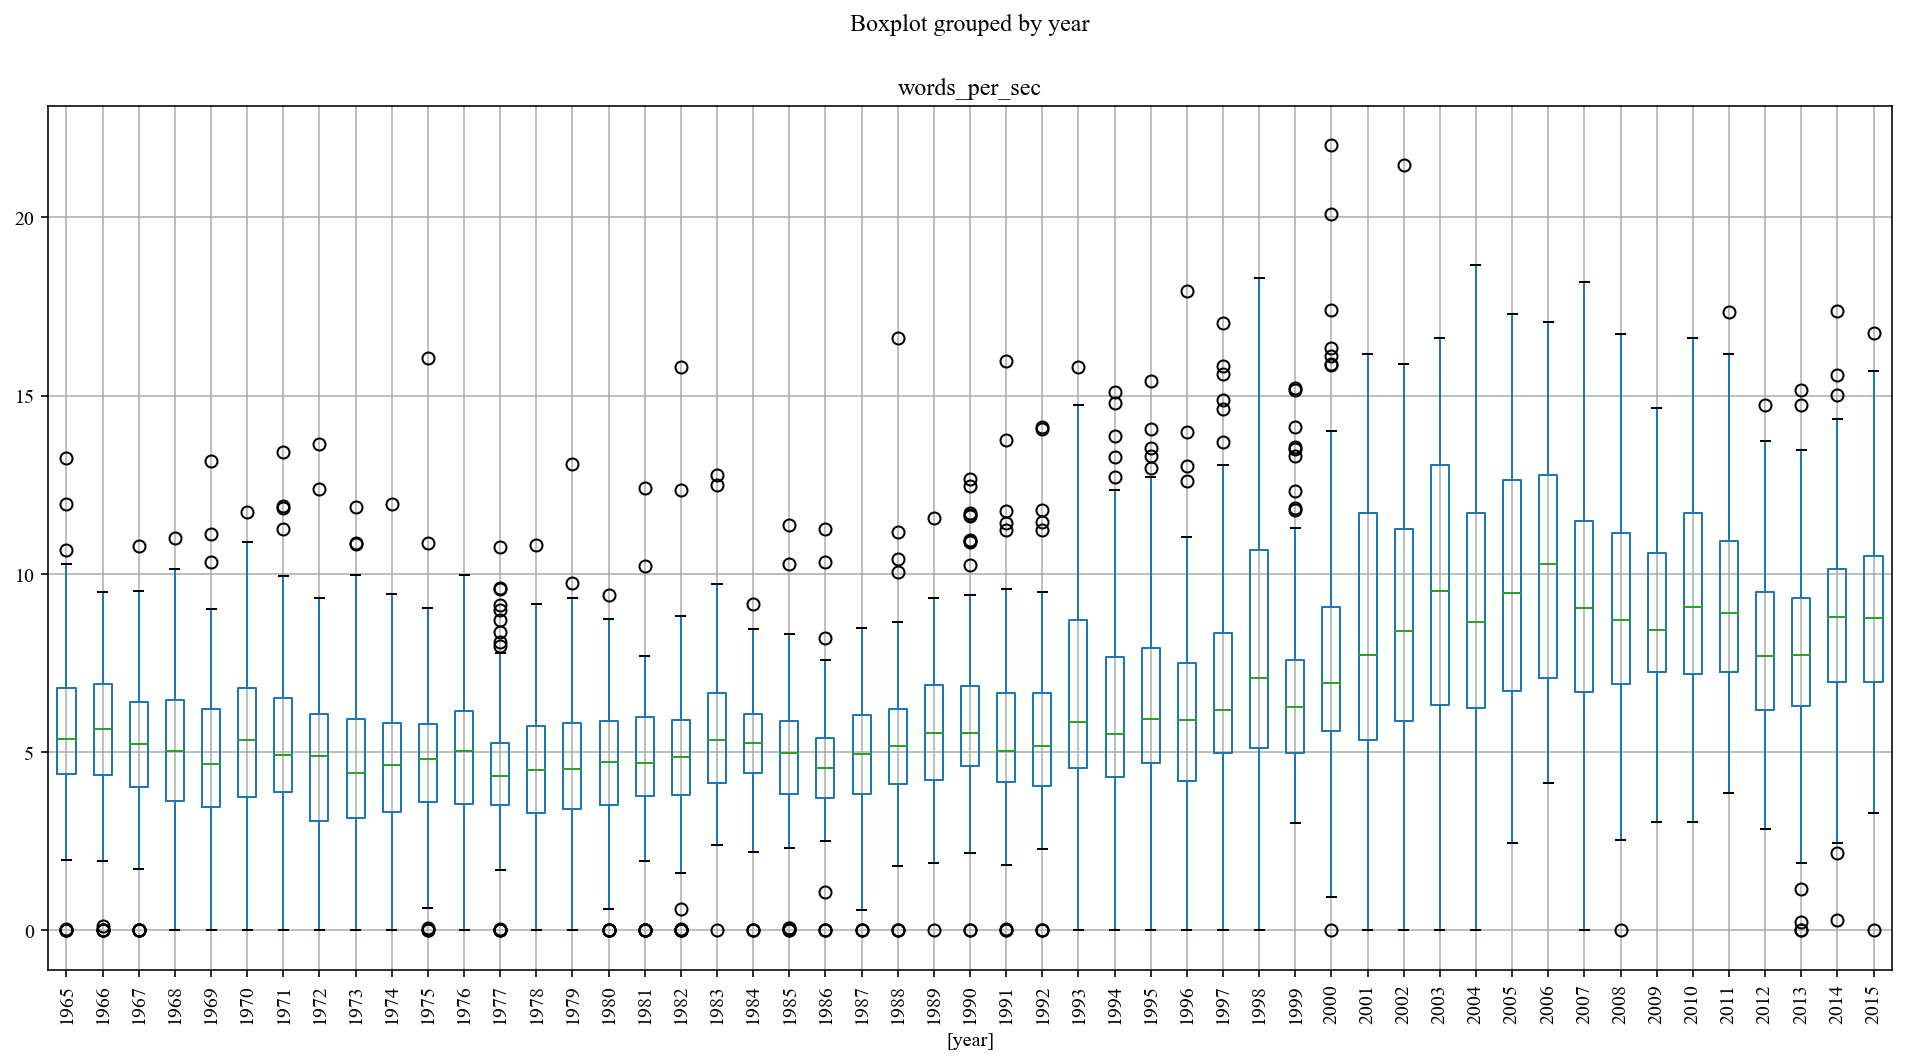

In [126]:
ax = df[['year','words_per_sec']].boxplot(by='year', figsize=(16,8), rot = 90)

### Most verbose artists

[Text(0,0.5,'average words_per_sec'), Text(0.5,0,'artist')]

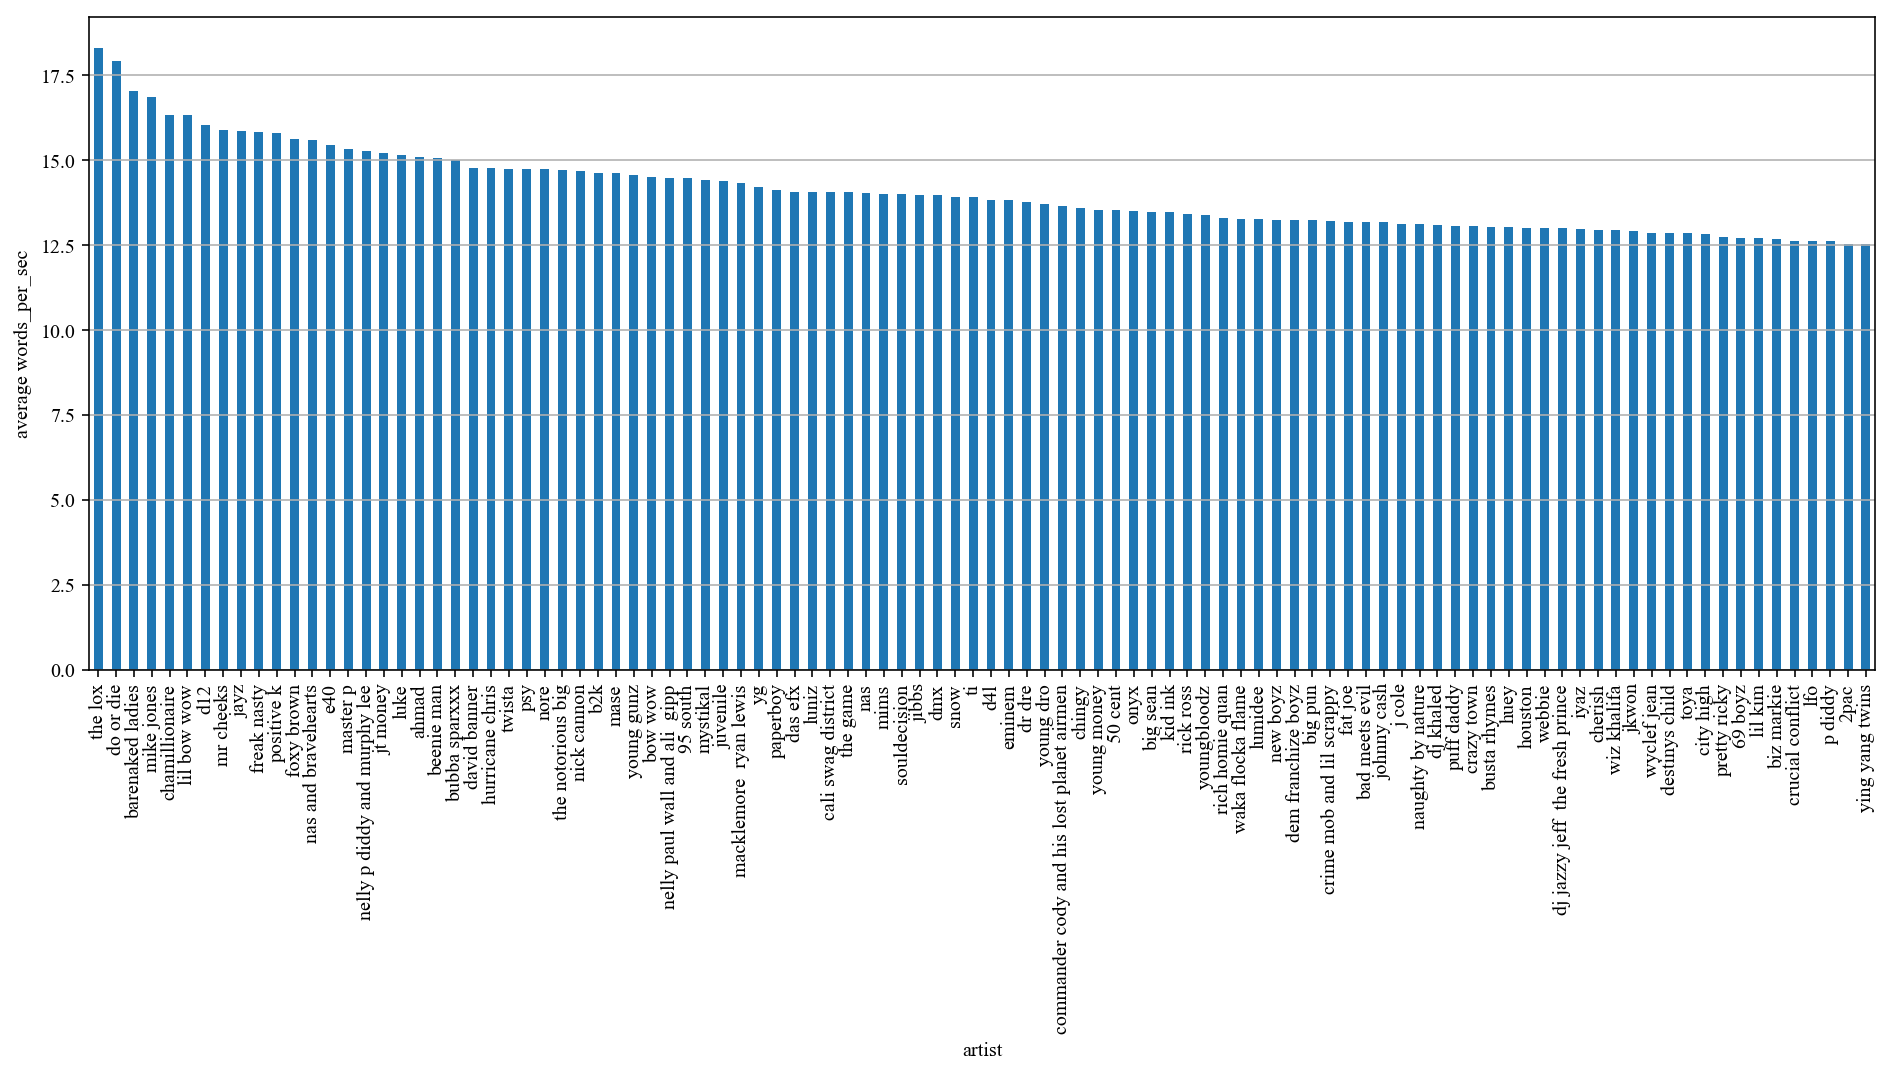

In [18]:
plt.figure(figsize=(16,6))
ax = df.groupby(['artist_base'])['words_per_sec'].mean().sort_values(ascending=False).head(100).plot.bar()
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='average words_per_sec')

# Collaboration over time

[Text(0,0.5,'number of songs with second artist')]

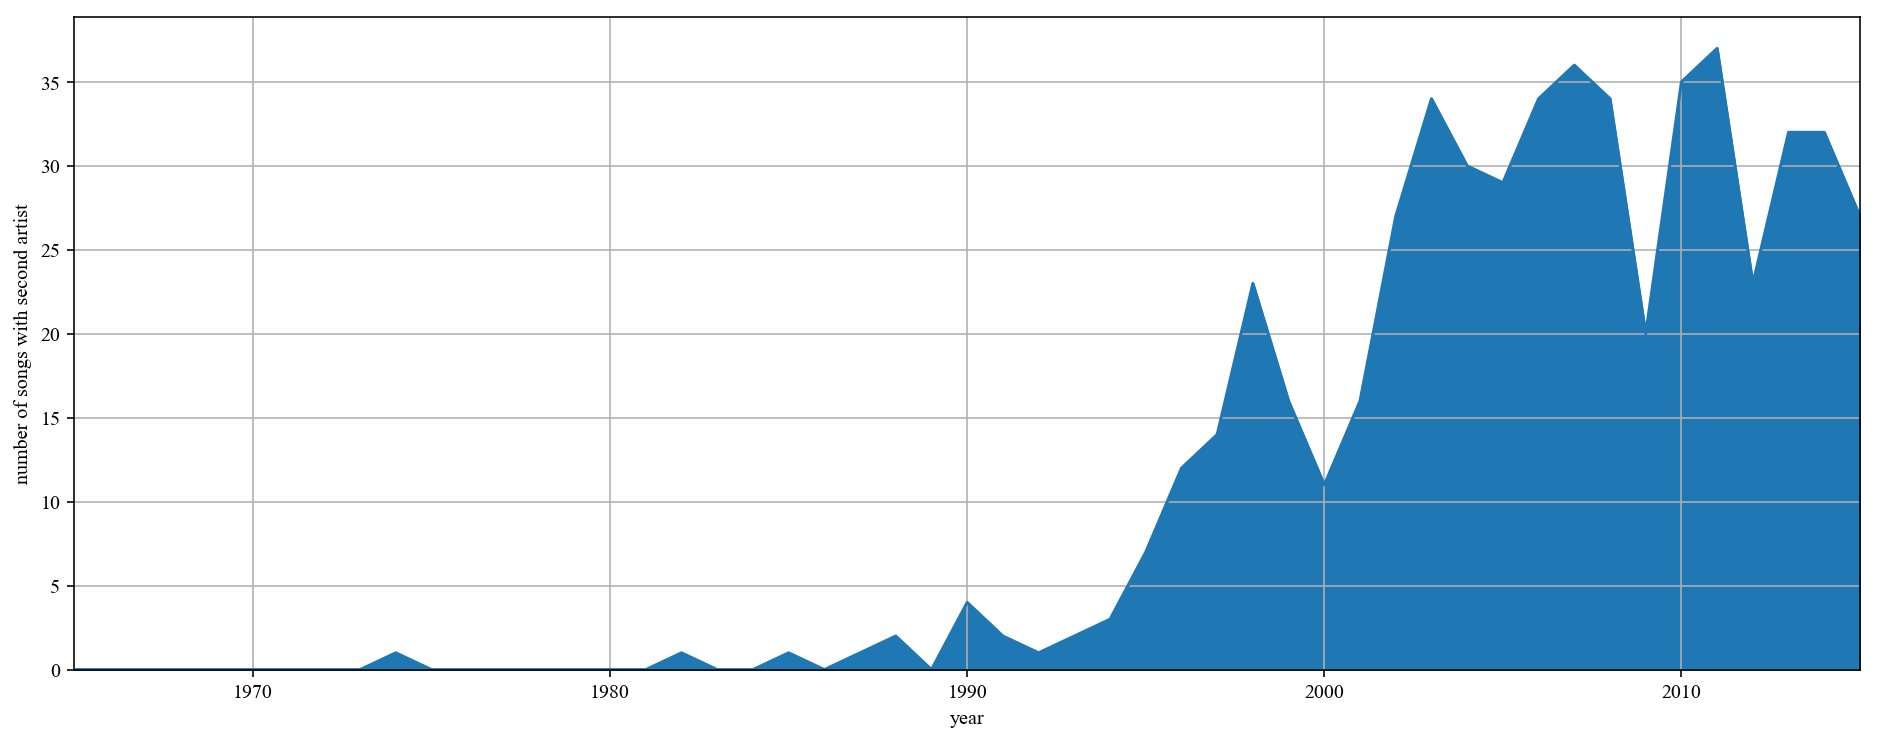

In [20]:
df_collab = df[df['artist'].str.contains('feat')]
df_collab = df_collab.groupby(['year'])['artist'].count().reindex(range(1965, 2016))
df_collab = df_collab.fillna(0)
ax = df_collab.plot.area(figsize=(16,6), grid=True)
ax.set(ylabel = 'number of songs with second artist')

### Most collaborative artists

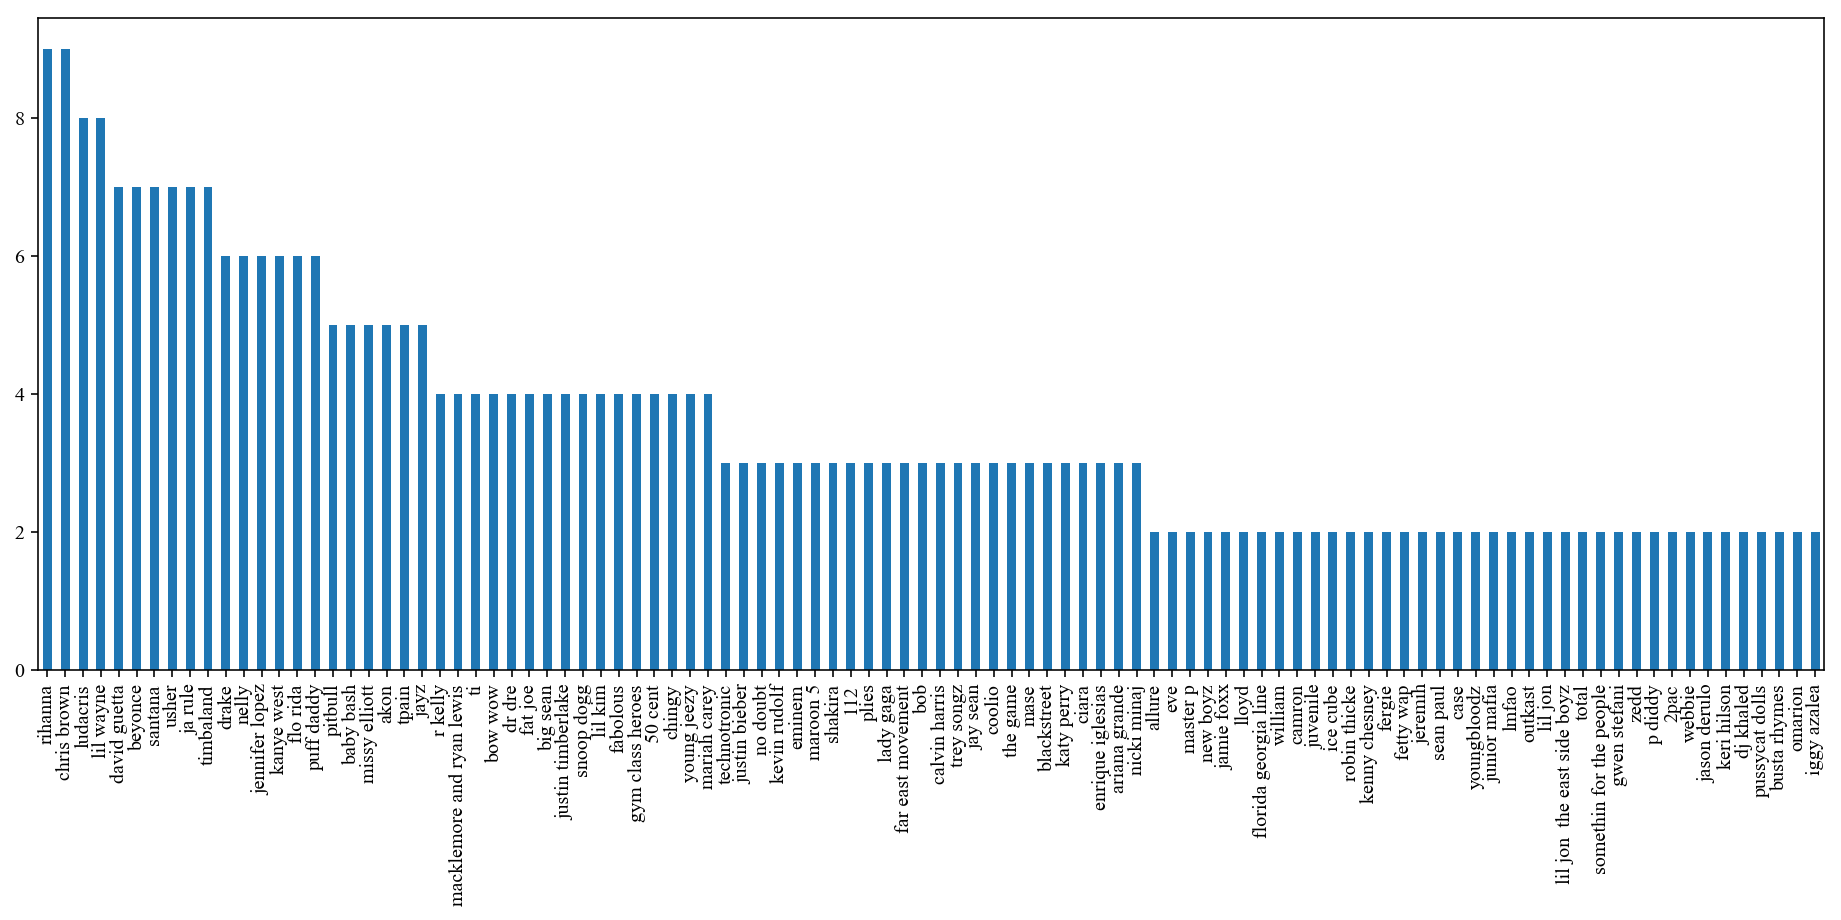

In [27]:
df_collab = df[df['artist'].str.contains('feat')]
df_collab['artist_base'].value_counts().head(100).plot.bar(figsize=(16,6))

# Parallel coordinates 

In [180]:
def zero_one_scaler(x):
    return (x - x.min()) / np.ptp(x)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


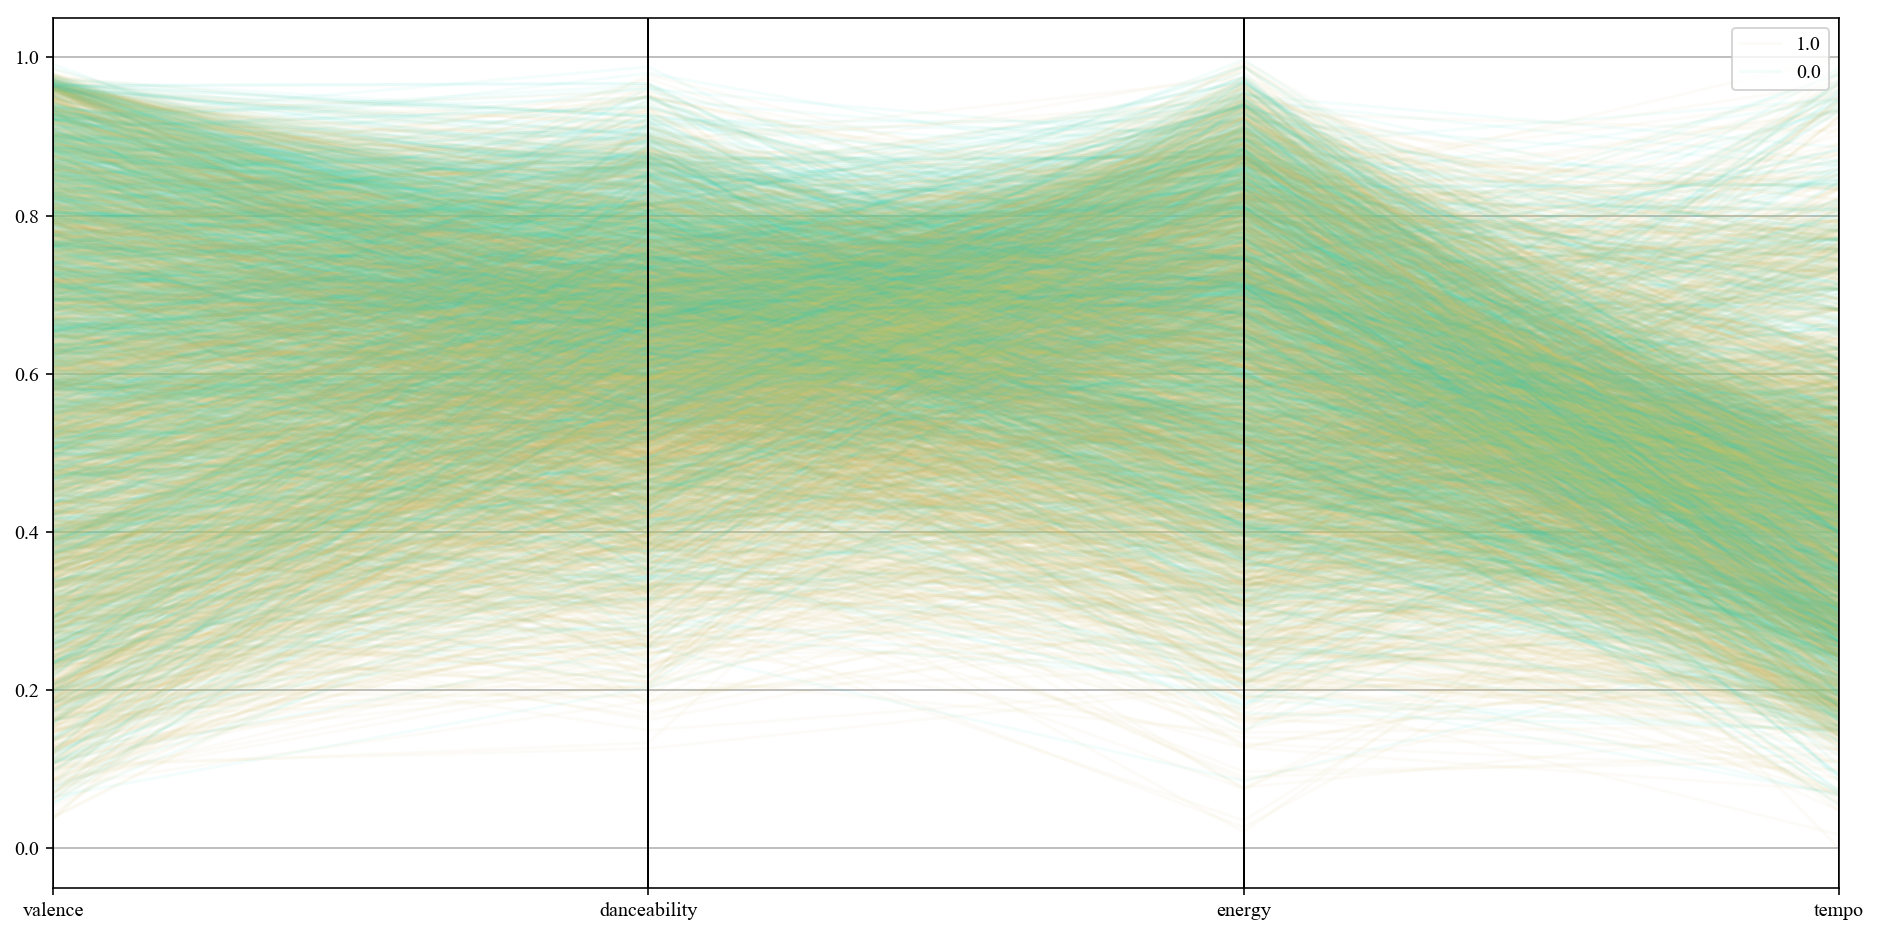

In [183]:
plt.figure(figsize=(16,8))
df_parcoords = df.loc[~np.any(df.isnull(), axis=1),:]
df_parcoords['tempo'] = zero_one_scaler(df_parcoords['tempo'])
columns = ['valence','danceability', 'energy', 'tempo']
ax = pd.plotting.parallel_coordinates(df_parcoords,
                                     'mode',
                                     columns,
                                     alpha=0.05)


/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


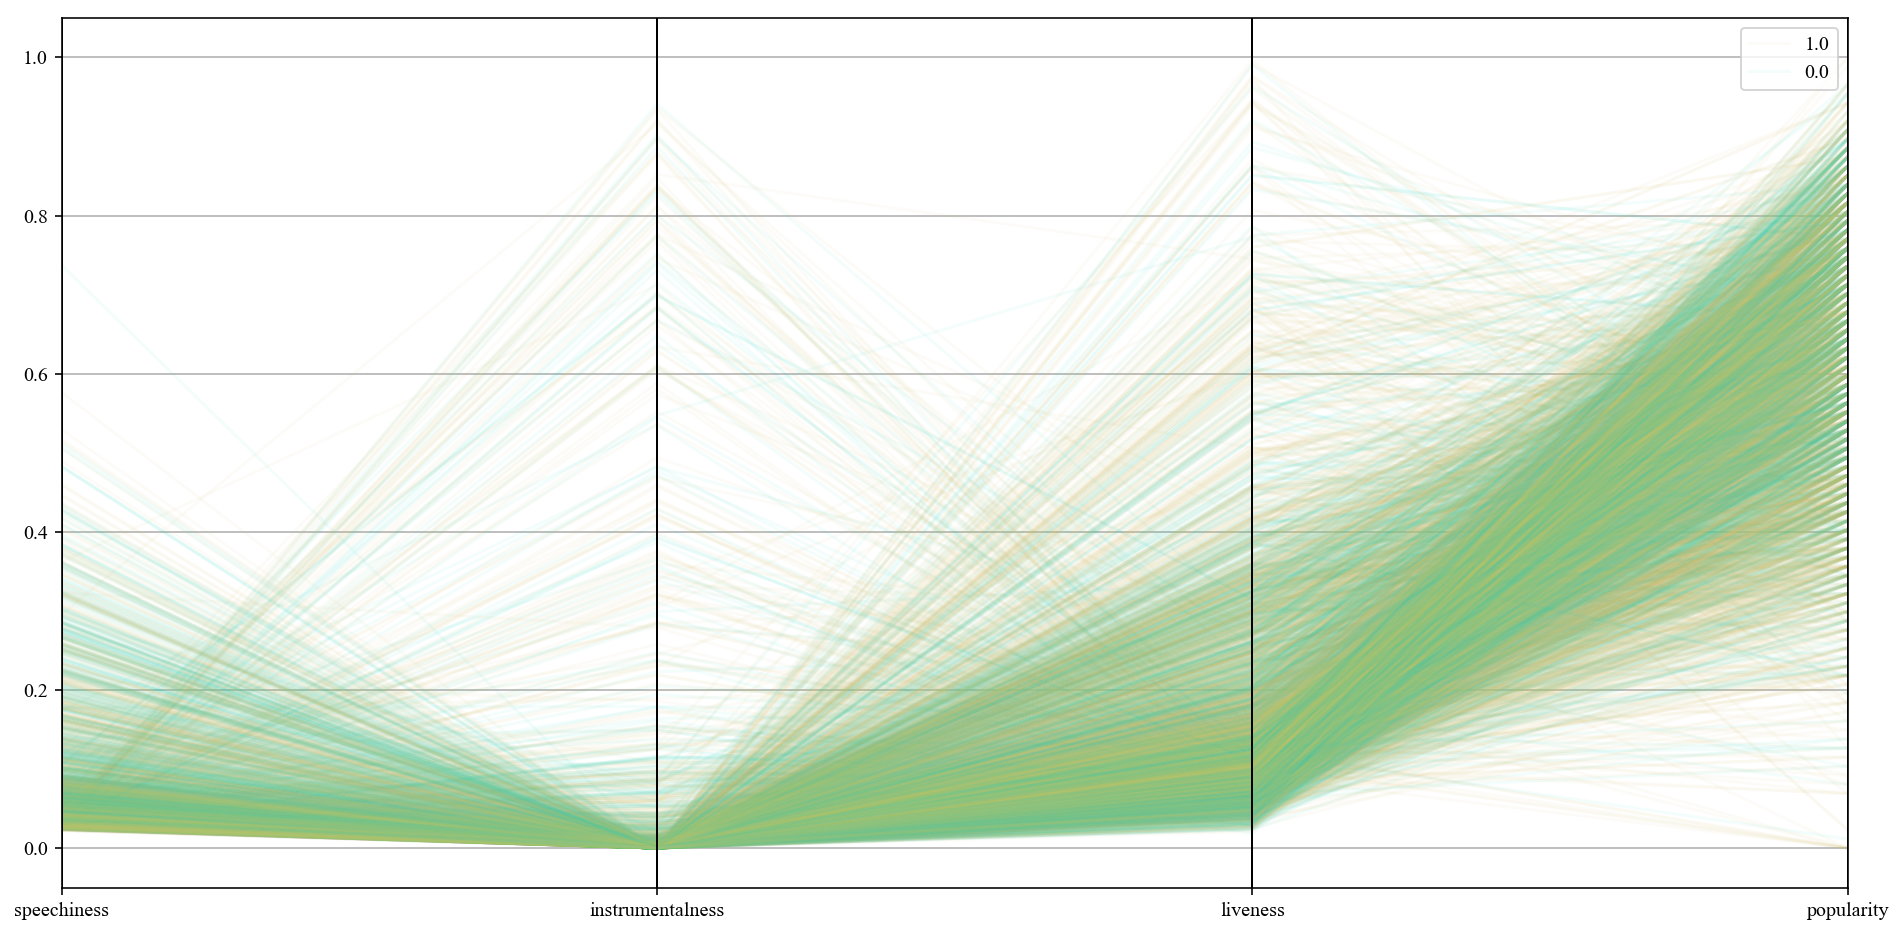

In [188]:
plt.figure(figsize=(16,8))
columns = ['speechiness', 'instrumentalness', 'liveness', 'popularity']
df_parcoords['popularity'] = zero_one_scaler(df['popularity'])
ax = pd.plotting.parallel_coordinates(df_parcoords,
                                     'mode',
                                     columns,
                                     alpha=0.05)

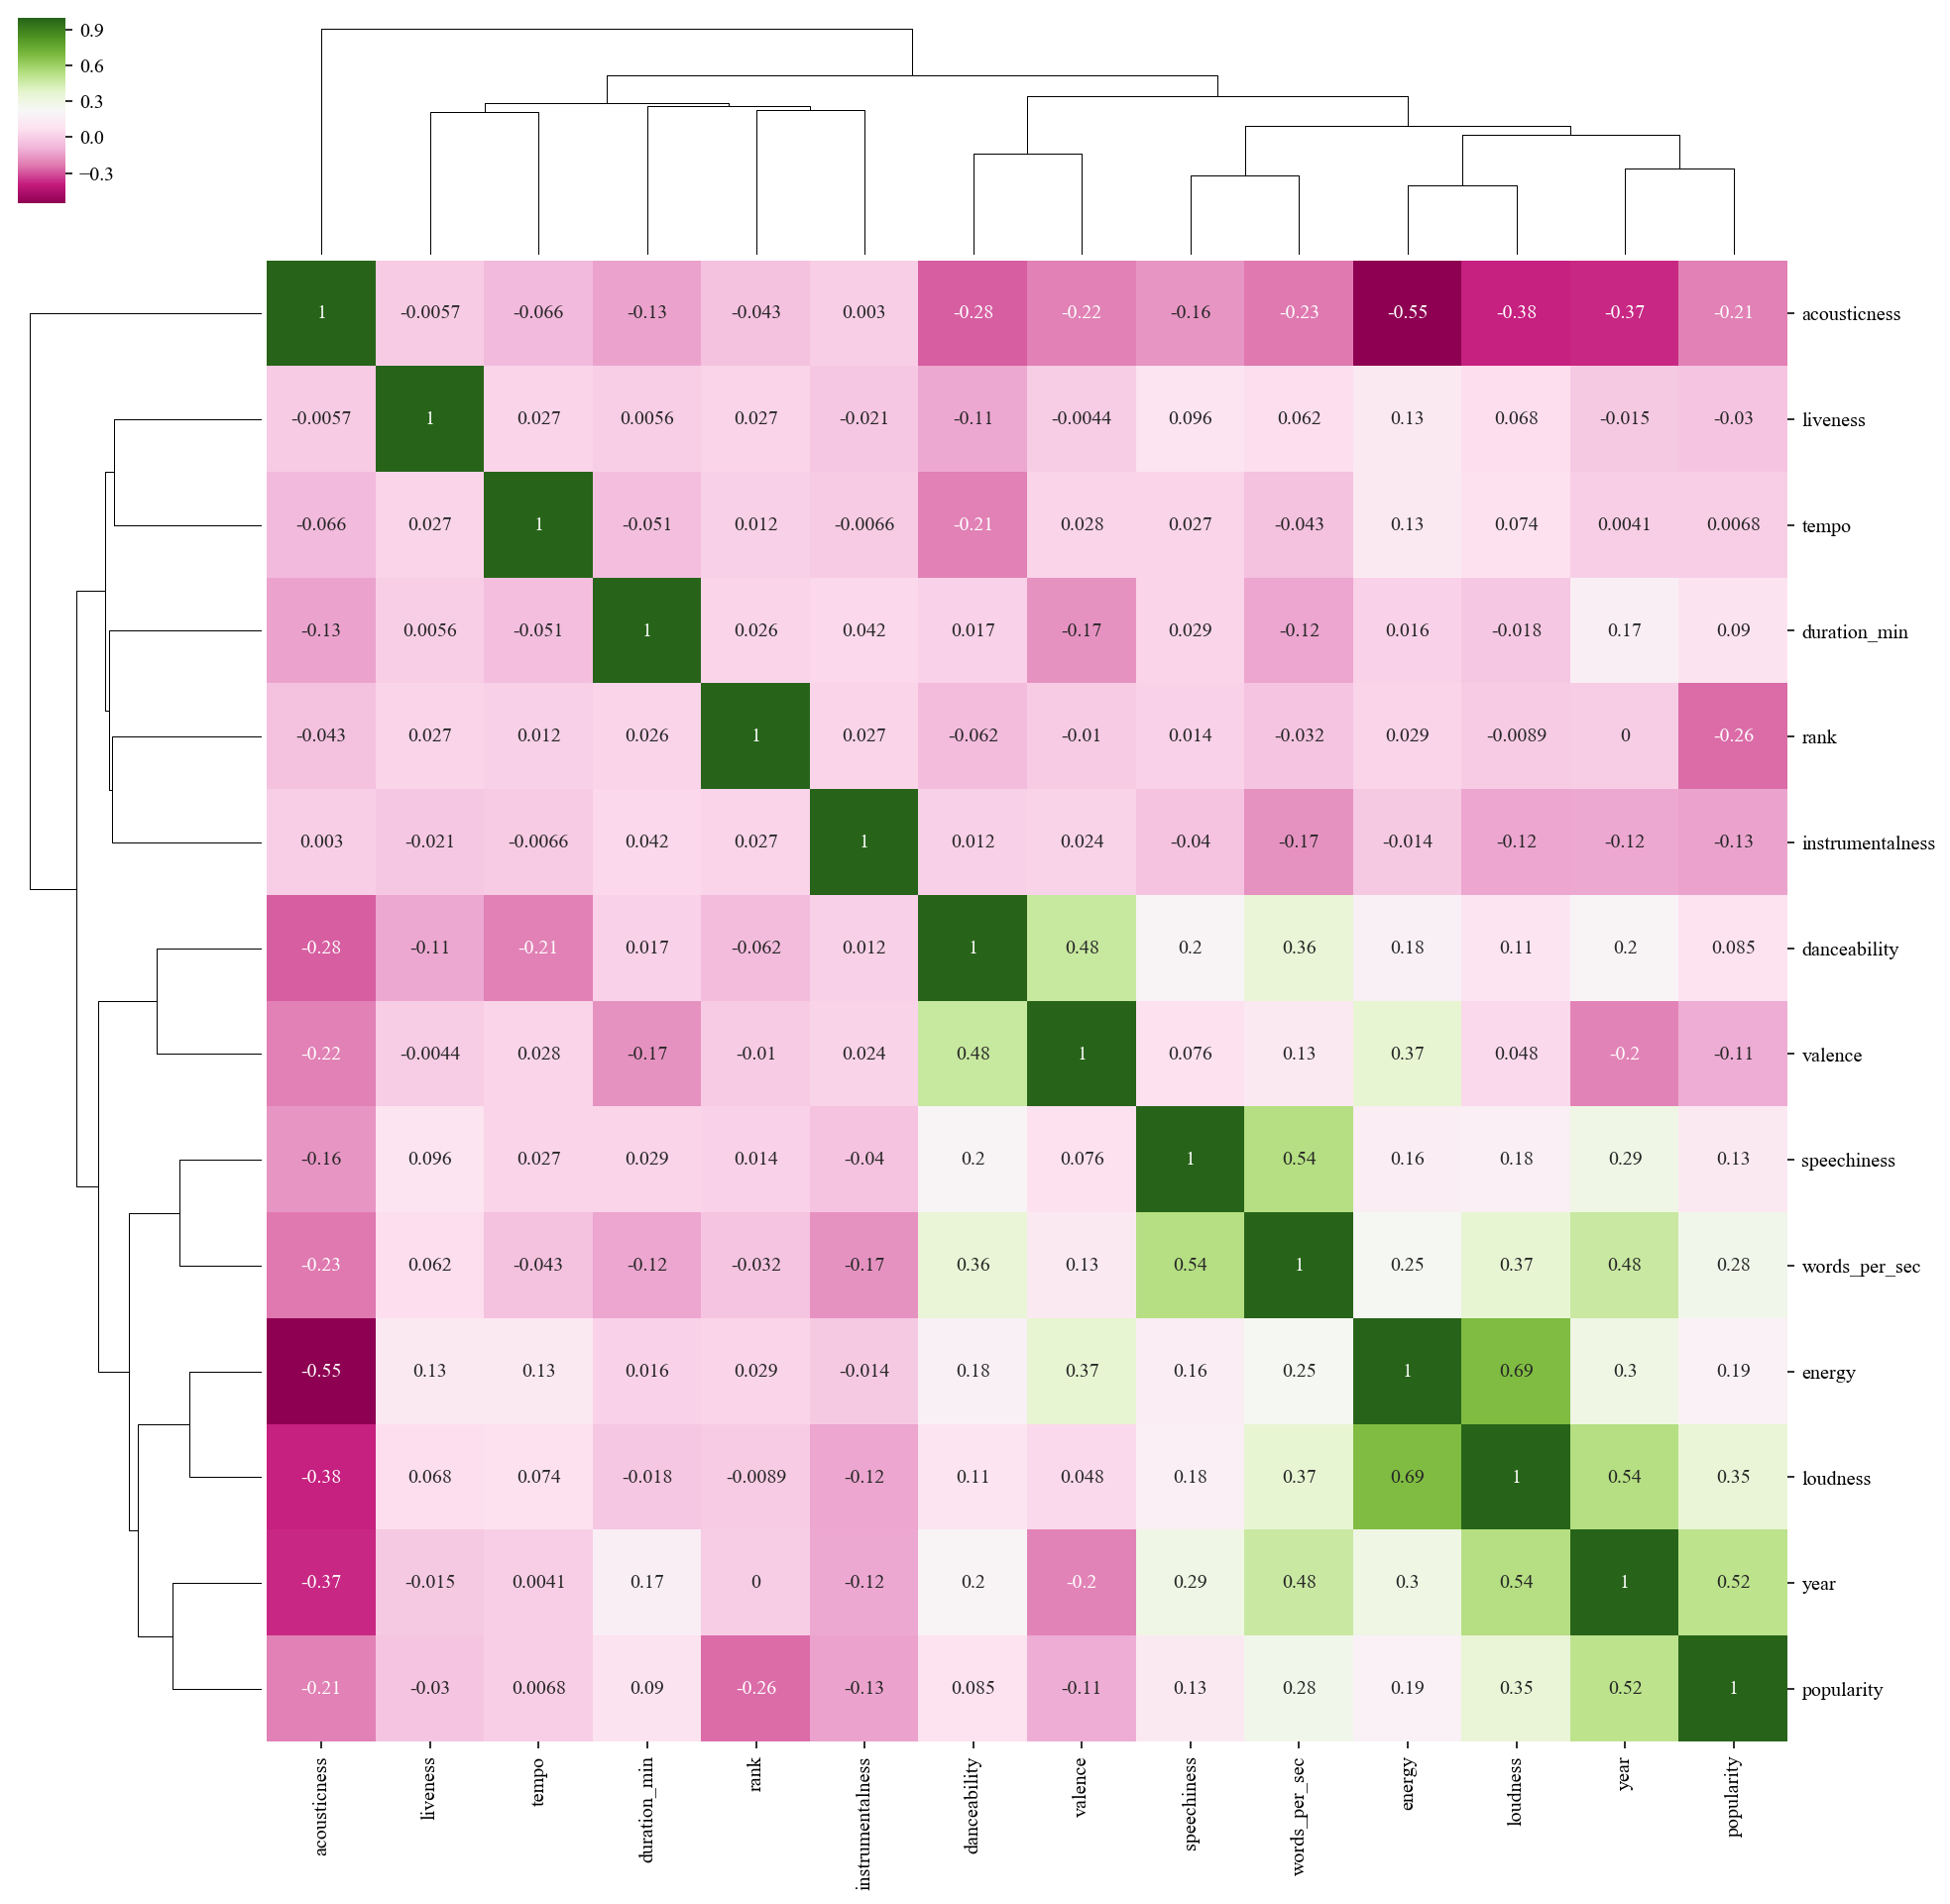

In [205]:
columns = ['rank', 'year', 'acousticness', 'danceability', 'duration_min', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'words_per_sec']
df_scatter = df[columns]
sns.clustermap(df_scatter.corr(), cmap='PiYG', annot=True, figsize=(16,16))

# Misc 

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


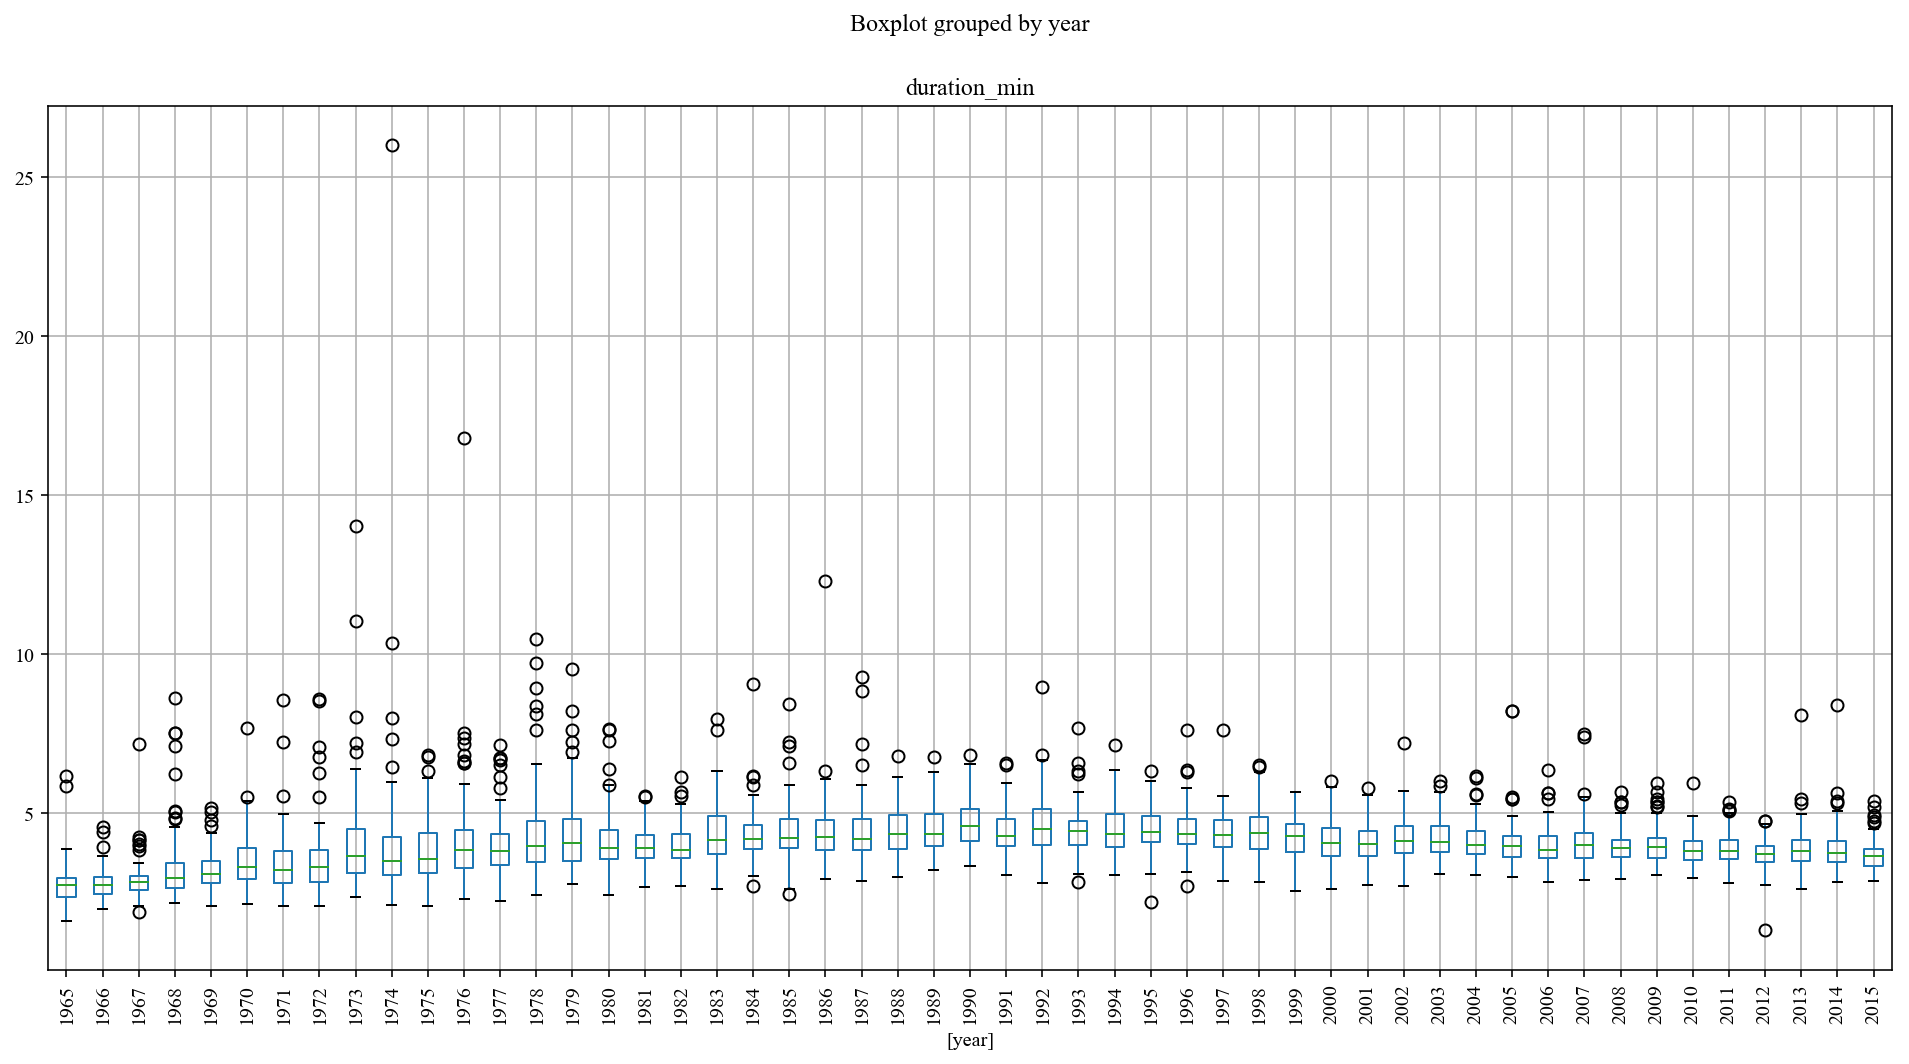

In [129]:
df['duration_min'] = df['duration_ms'] / 1000 / 60
ax = df[['year','duration_min']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


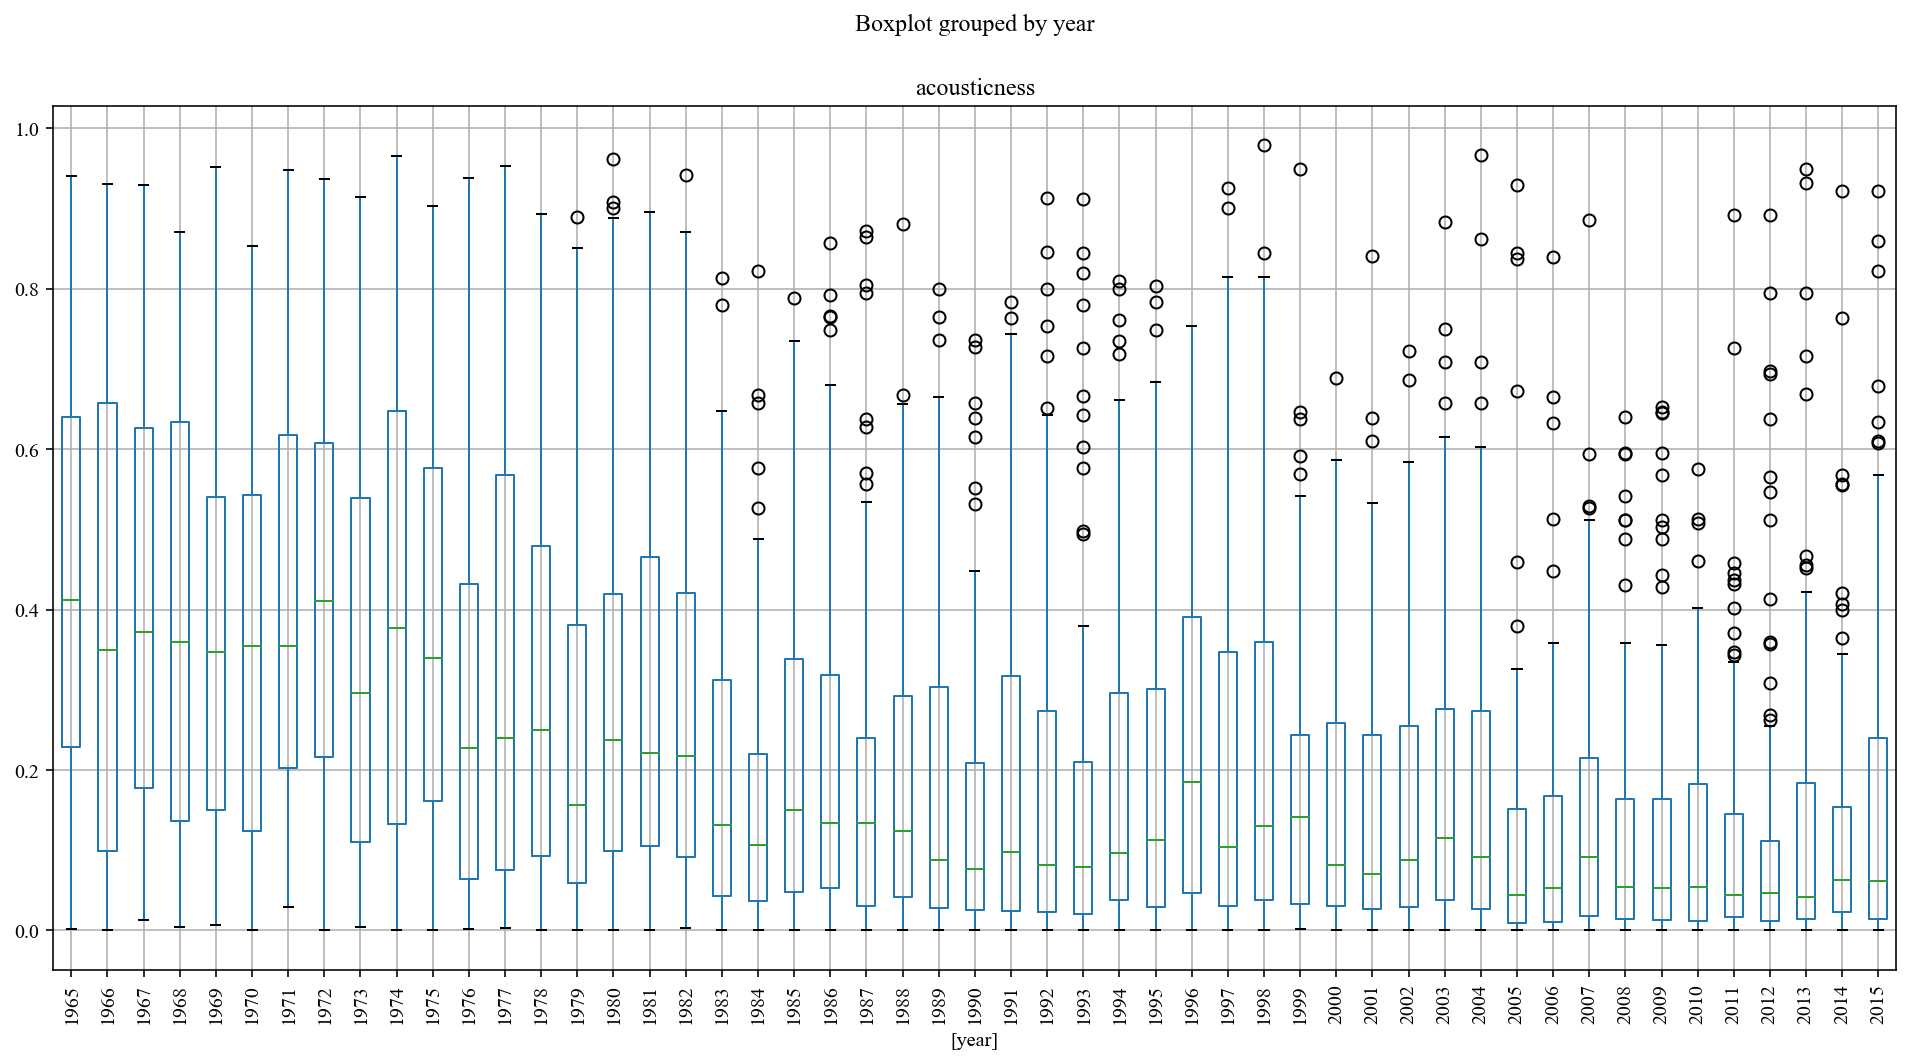

In [130]:
ax = df[['year','acousticness']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


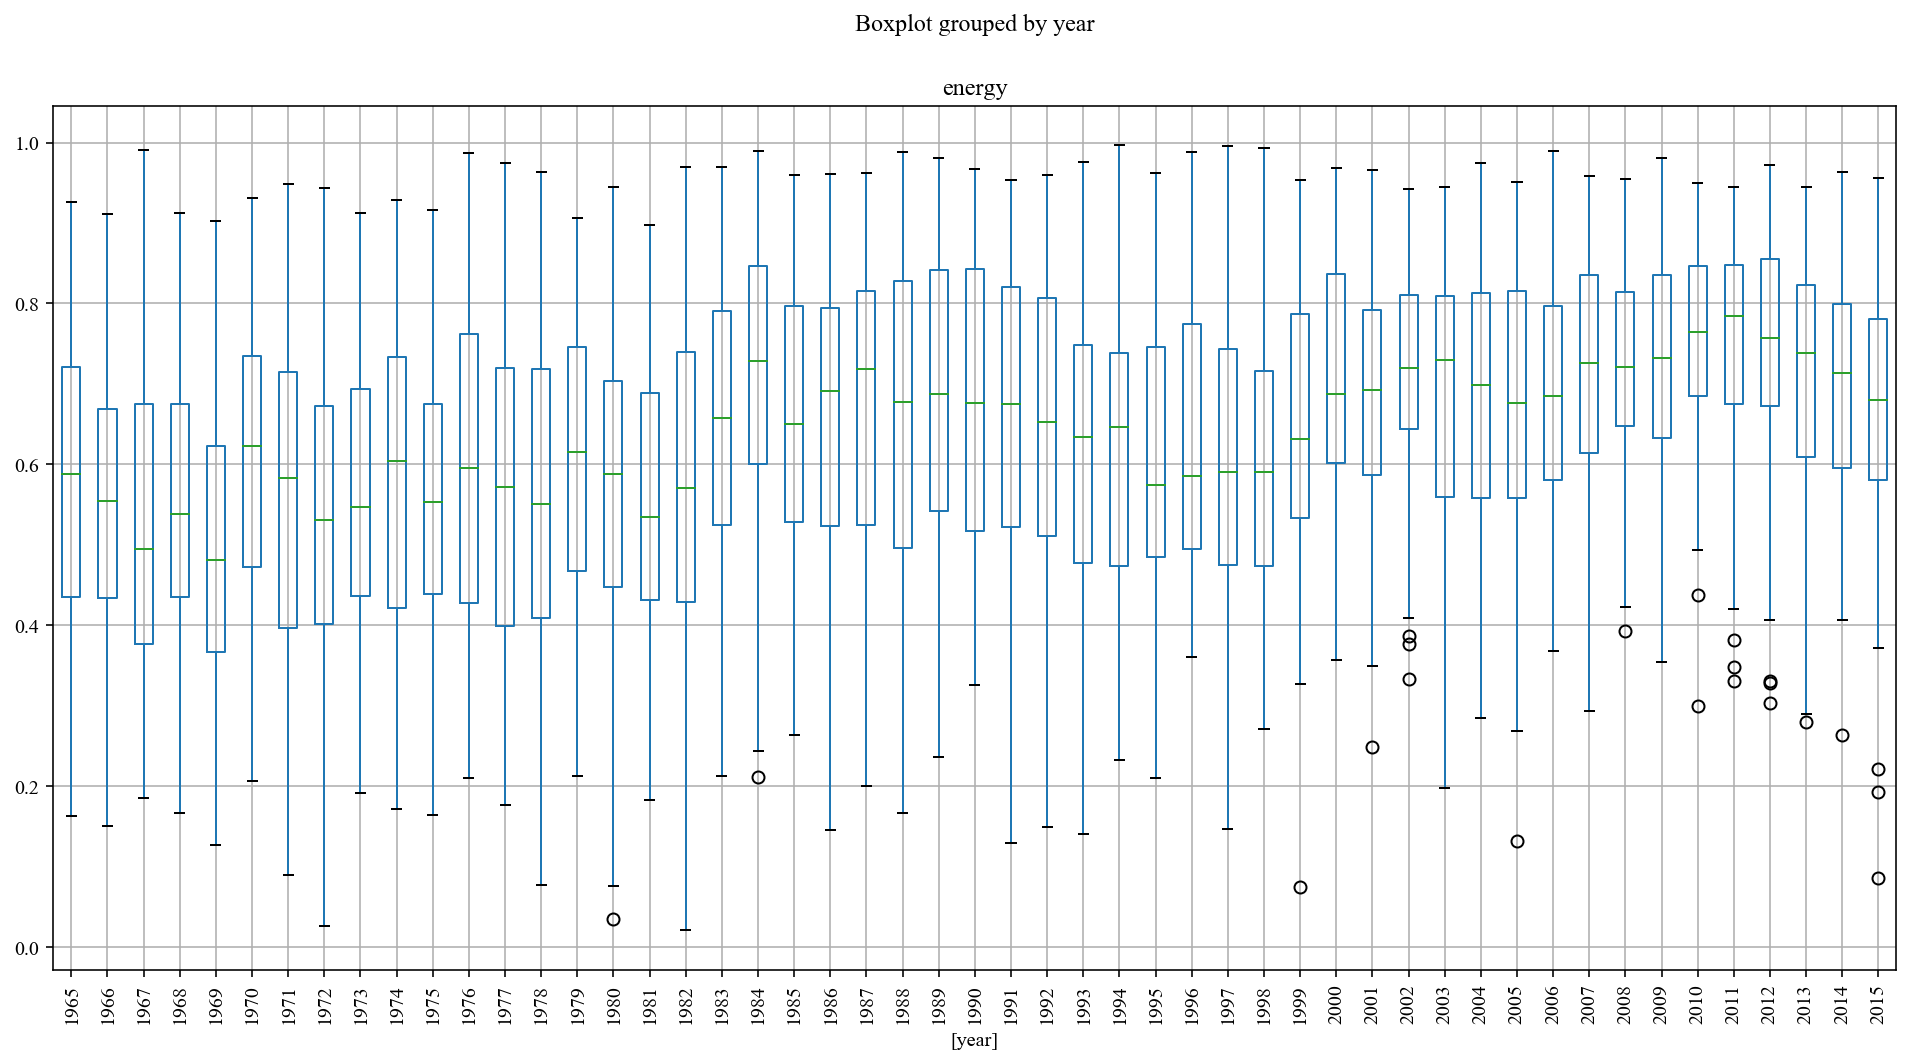

In [131]:
ax = df[['year','energy']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


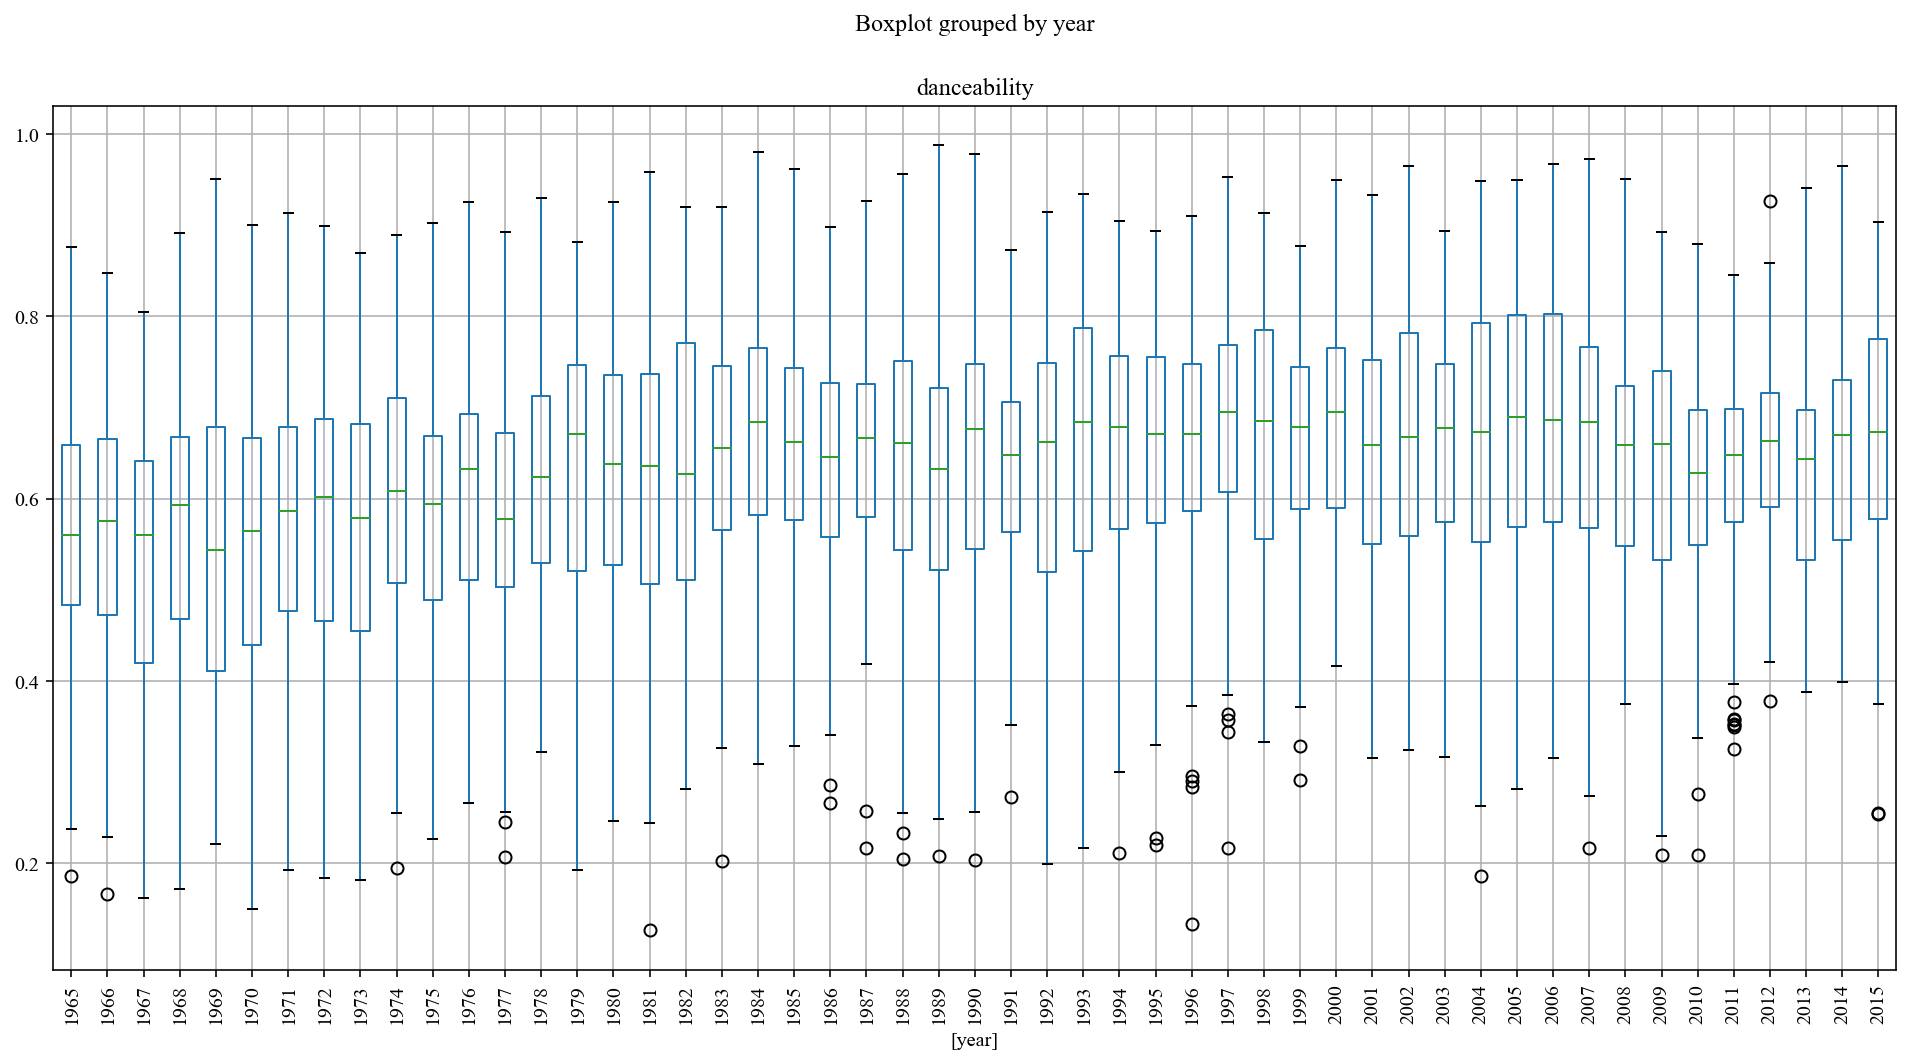

In [133]:
ax = df[['year','danceability']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


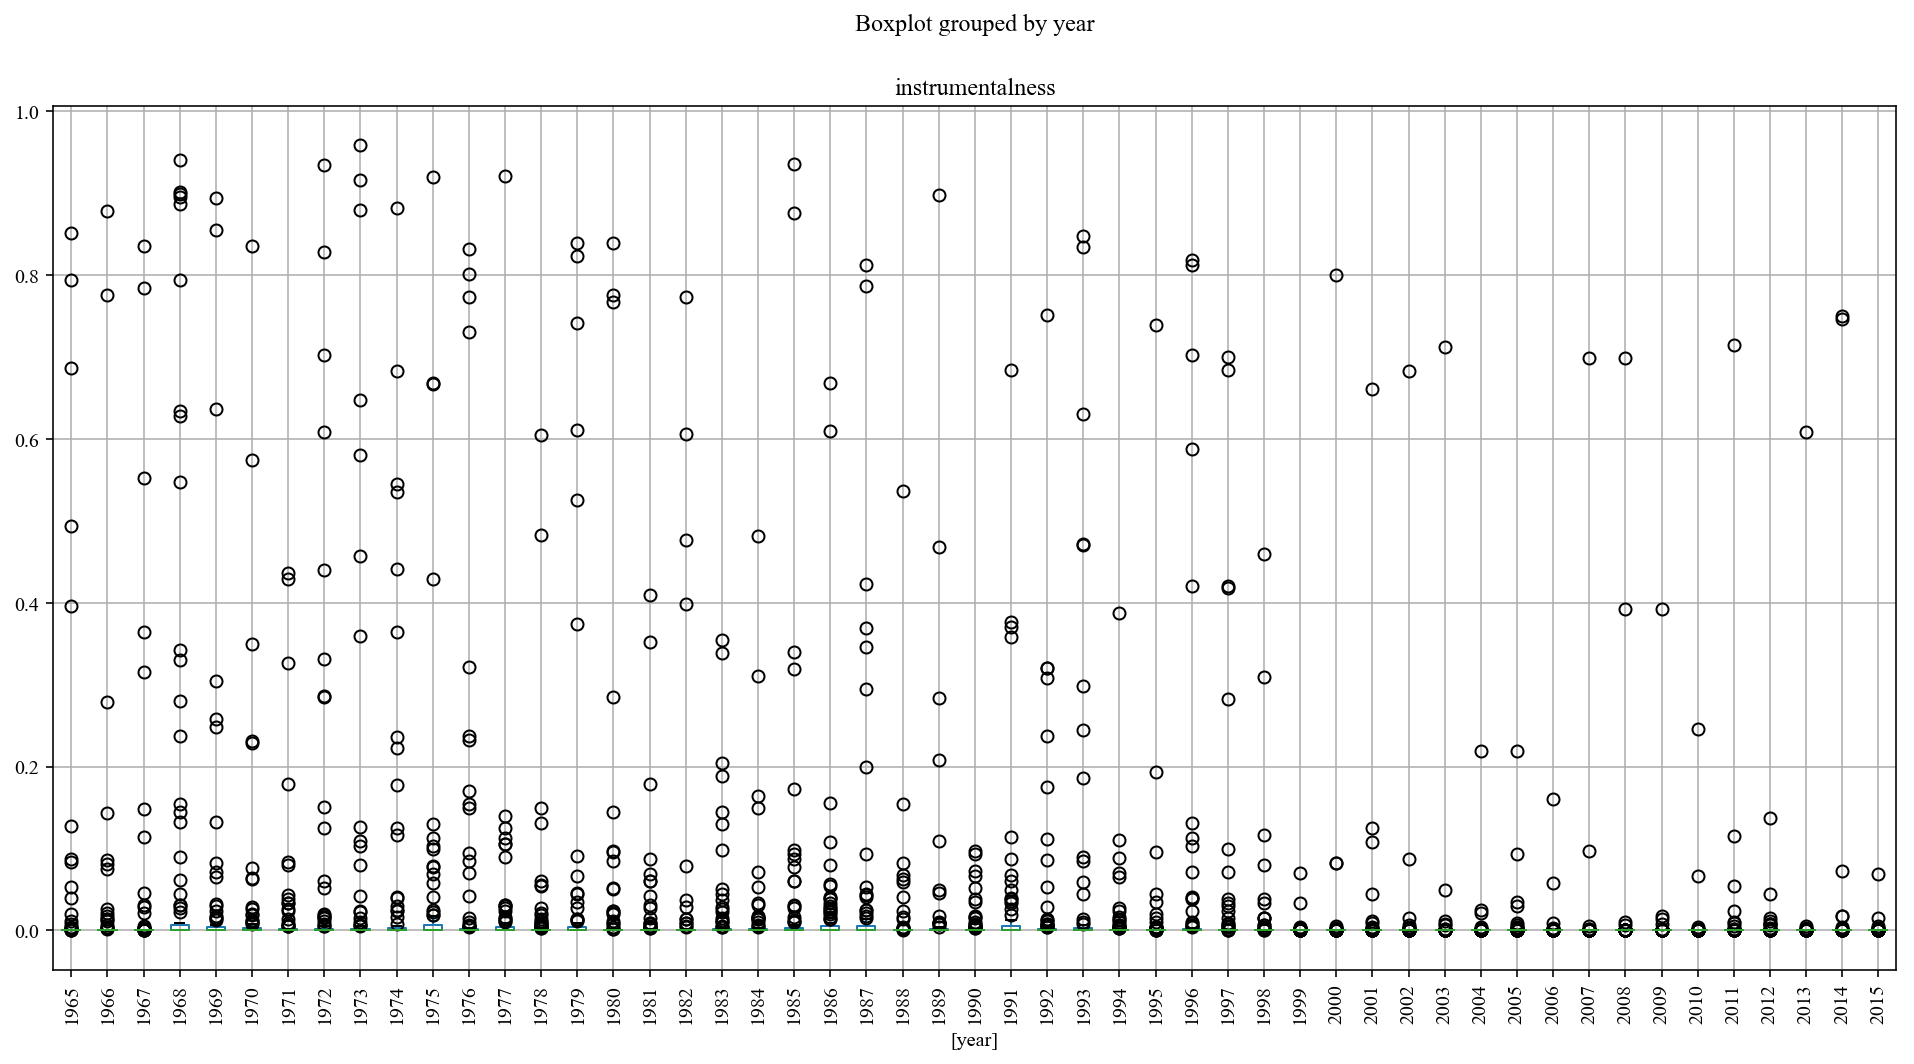

In [134]:
ax = df[['year','instrumentalness']].boxplot(by='year', figsize=(16,8), rot = 90)

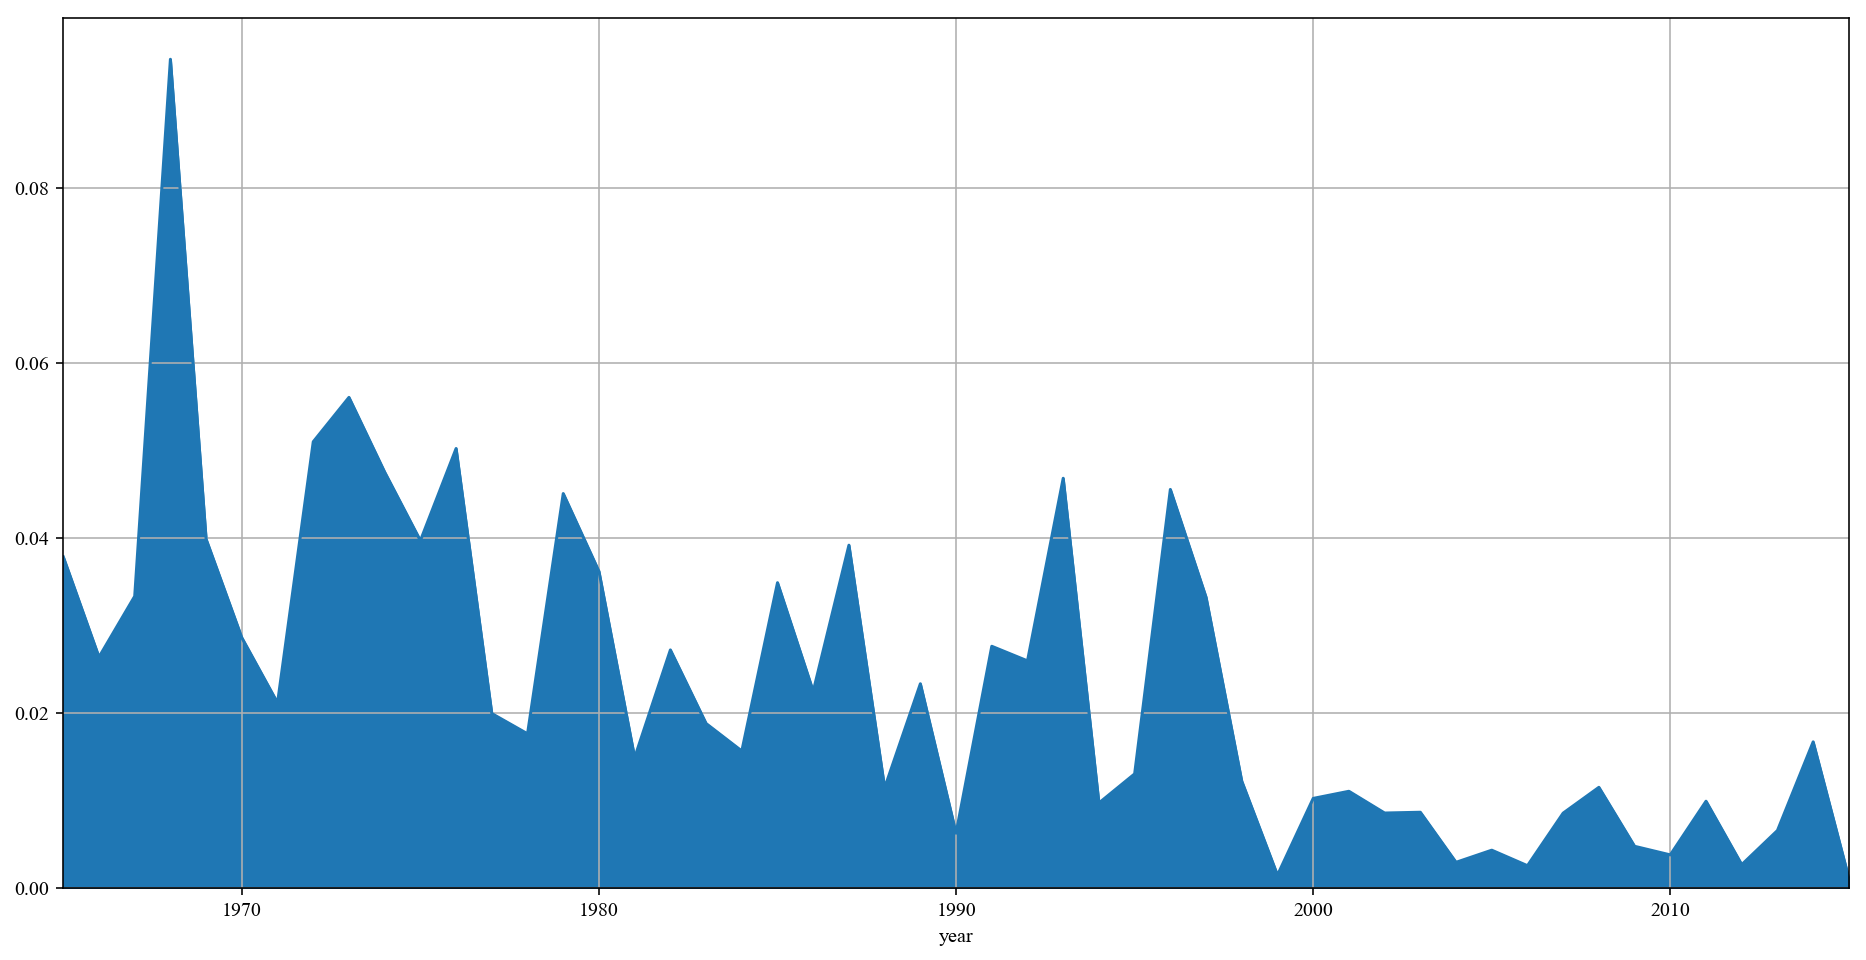

In [141]:
ax = df.groupby(['year'])['instrumentalness'].mean().plot.area(figsize=(16,8), grid=True)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


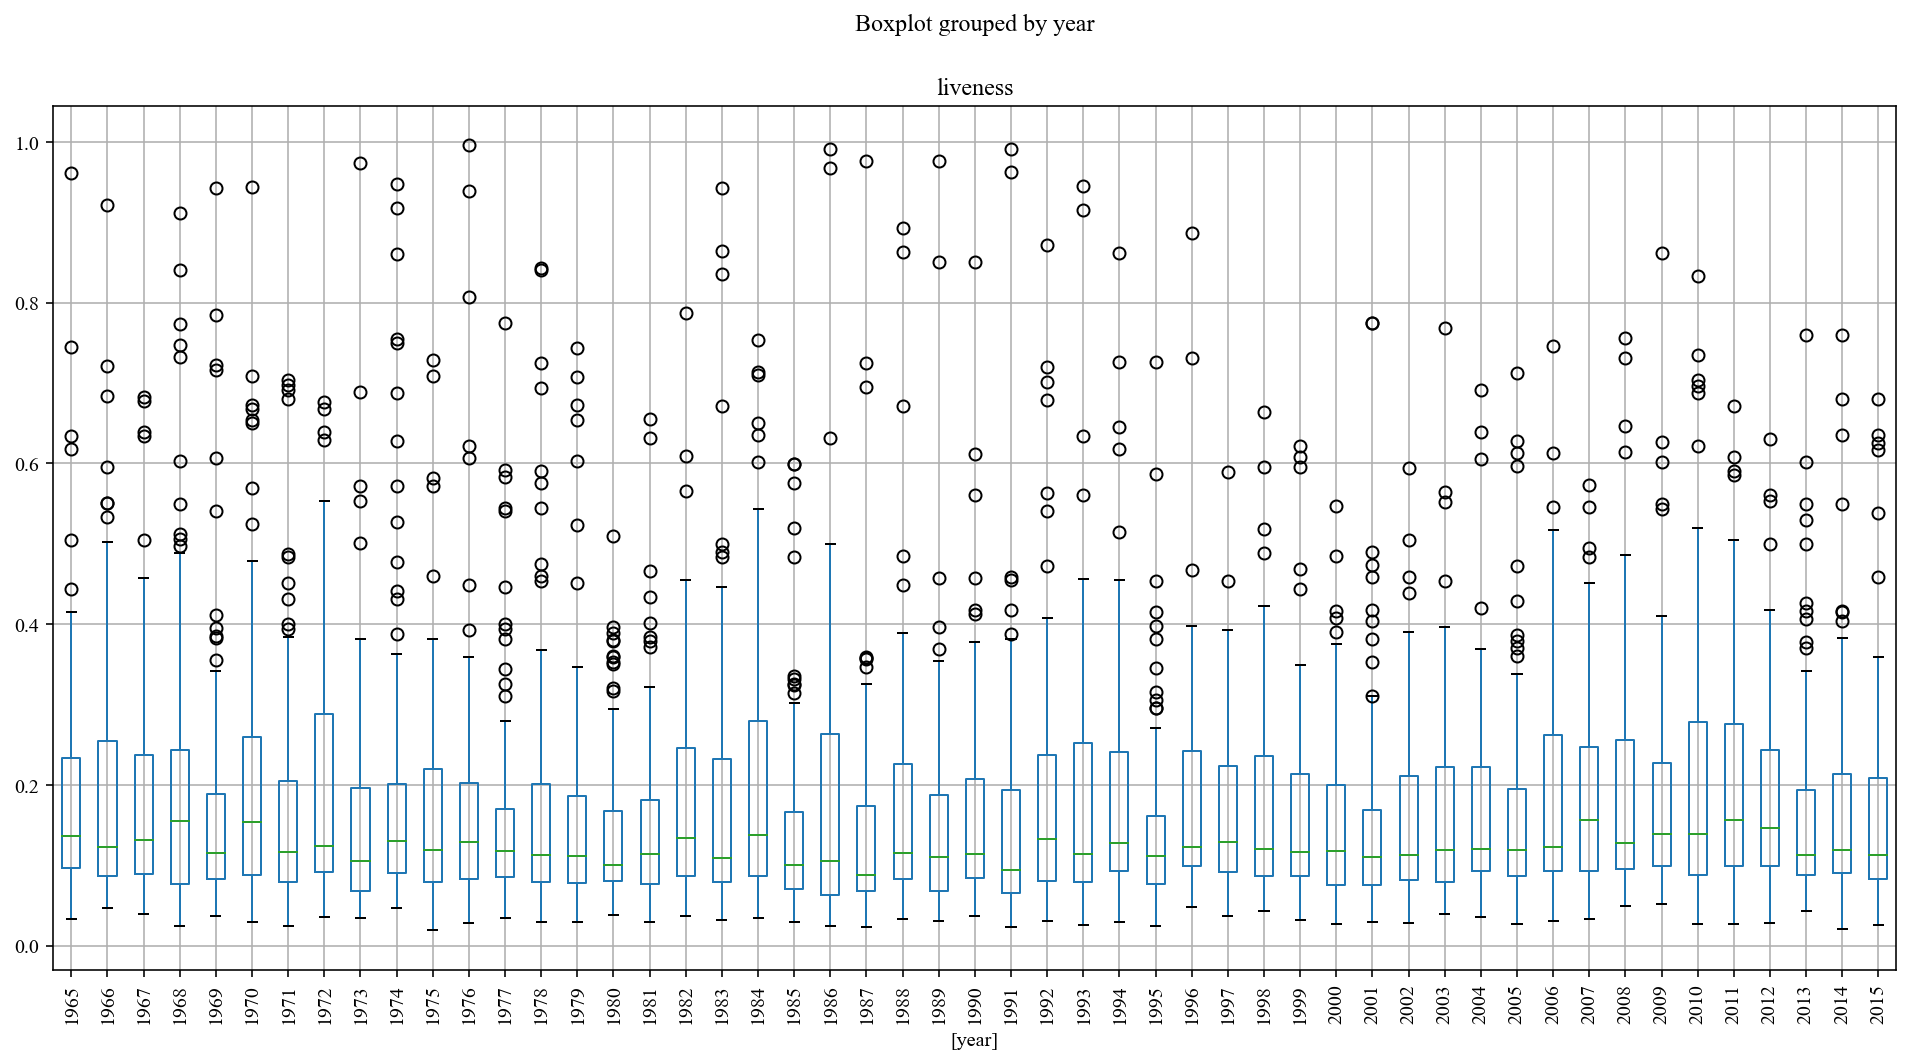

In [135]:
ax = df[['year','liveness']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


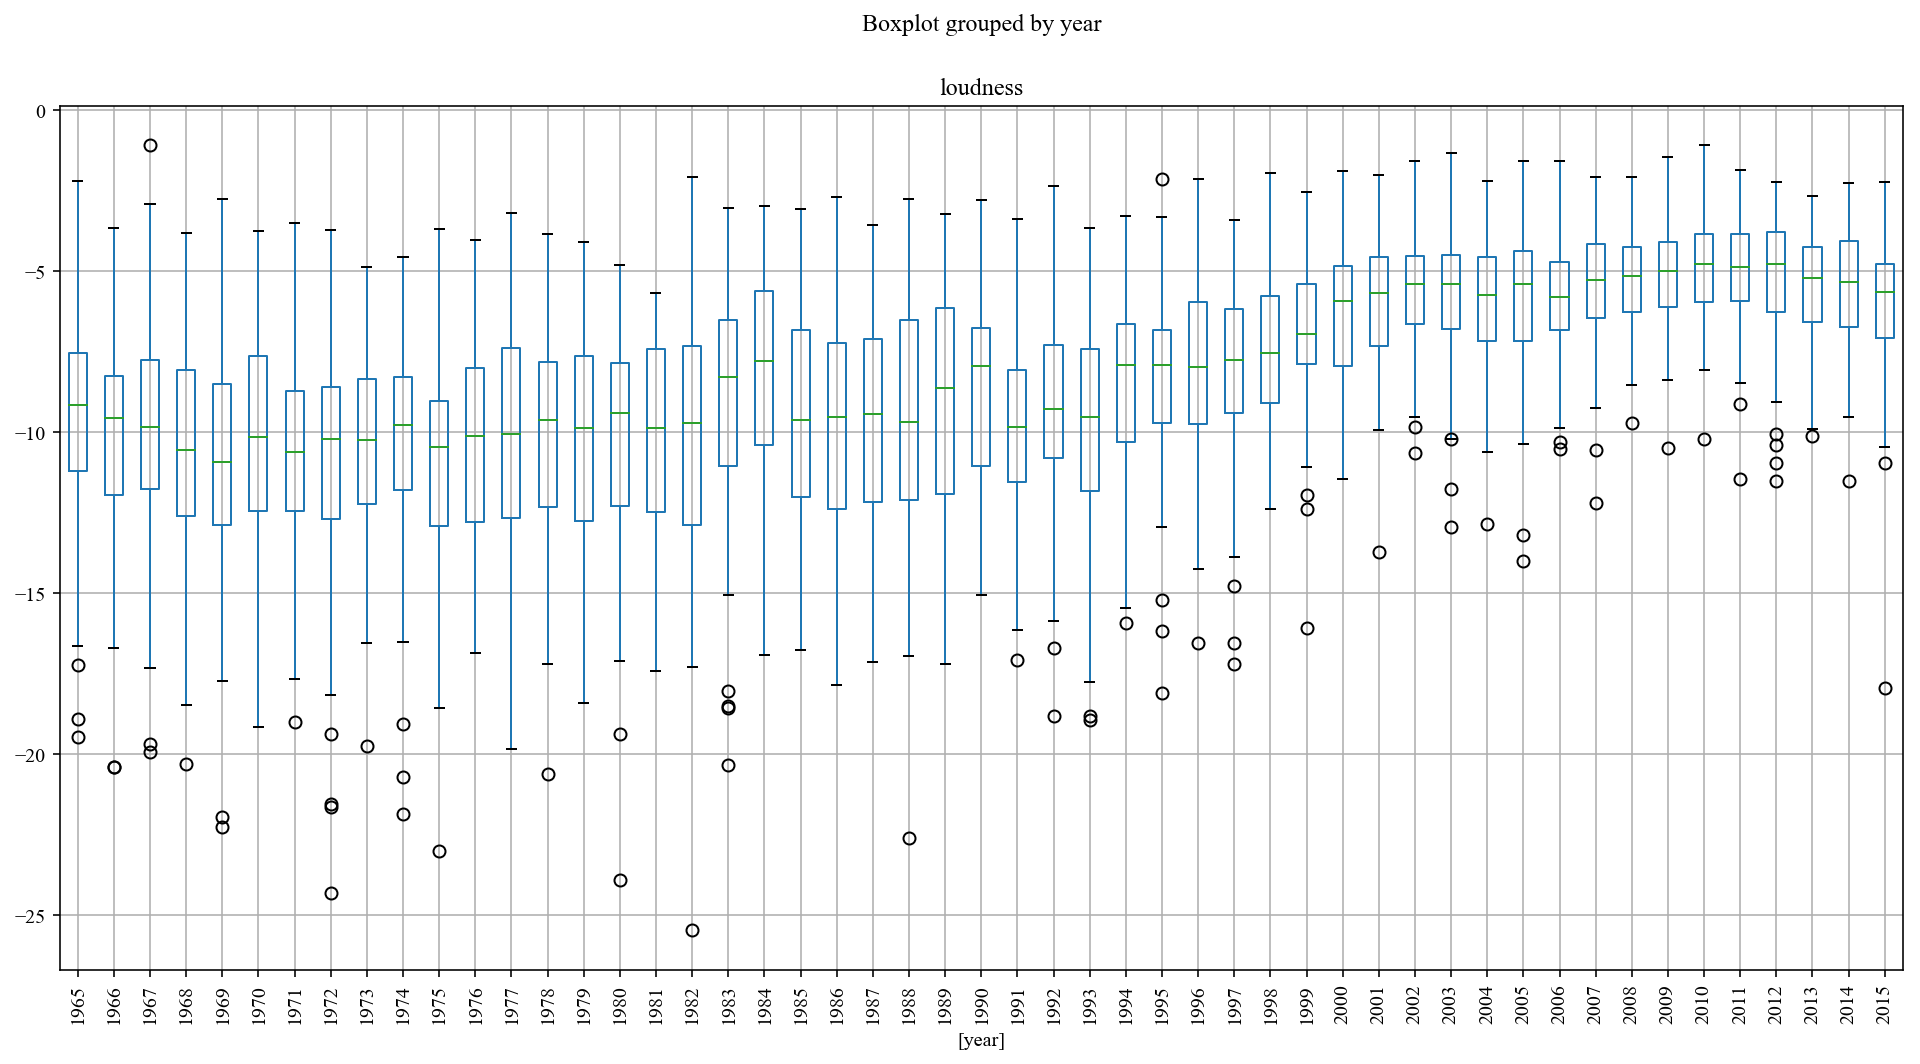

In [136]:
ax = df[['year','loudness']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


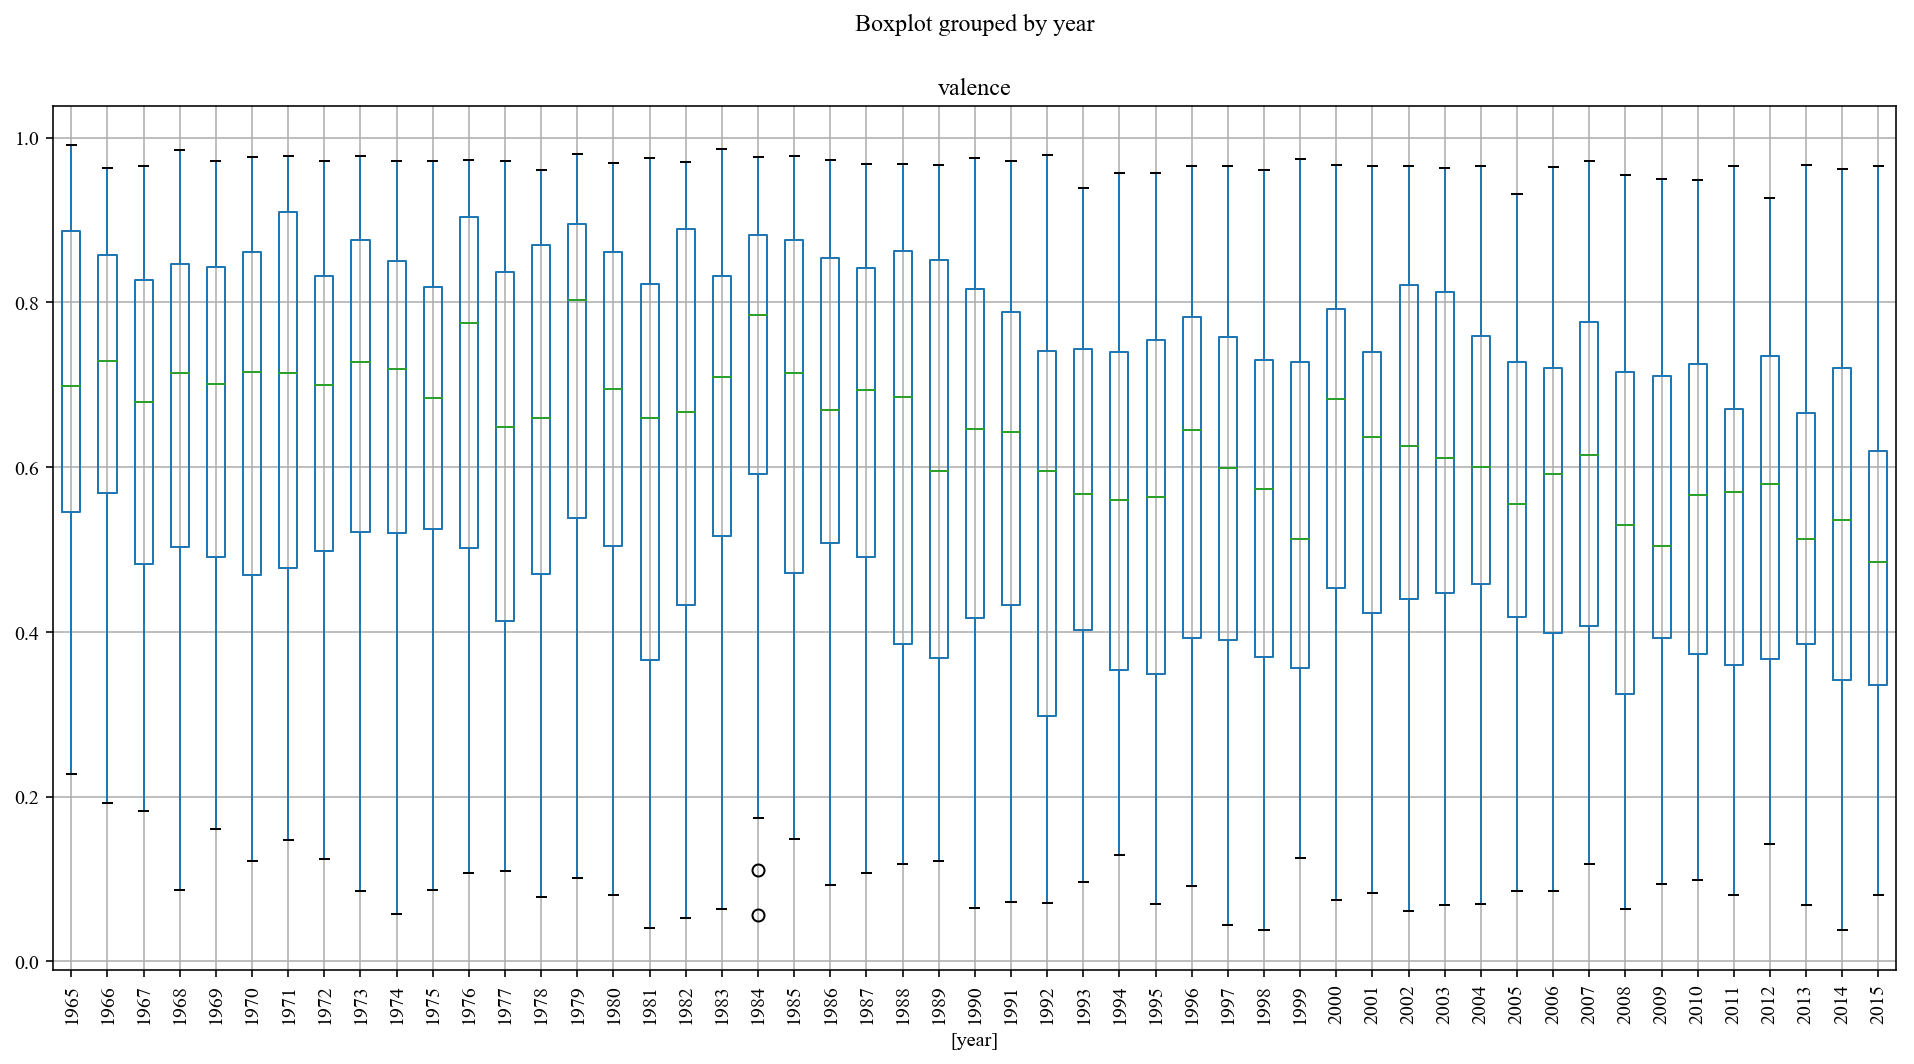

In [137]:
ax = df[['year','valence']].boxplot(by='year', figsize=(16,8), rot = 90)